#Final Project

##Analyzing Diabetes Dataset

Data Loading And Preprocessing

Load the Dataset

In [809]:
library(ggplot2)
library(dplyr)
library(tidyr)


data <- read.csv("/content/diabetes_dataset.csv")

In [810]:
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


Inspect the Data

In [811]:
# Check structure of the data
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [812]:
# Summary statistics
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [813]:

# Check for missing values
colSums(is.na(data))


Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [814]:
# Replace zeros with NA in specific columns
columns_to_replace <- c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")
data[columns_to_replace] <- data[columns_to_replace] %>%
  mutate(across(everything(), ~ replace(., . == 0, NA)))

# Count NA values in each column
na_counts <- colSums(is.na(data))

# Print the counts of NA values per column
print(na_counts)


             Pregnancies                  Glucose            BloodPressure 
                       0                        5                       35 
           SkinThickness                  Insulin                      BMI 
                     227                      374                       11 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


In [815]:
num_rows <- nrow(data)

# Print the result
print(paste("The number of rows in the dataset is:", num_rows))


[1] "The number of rows in the dataset is: 768"


Drop Columns with a Small Number of NAs

In [816]:
# Columns to check for NA
columns_to_check <- c("BloodPressure", "Glucose", "BMI")

# Drop rows with NA in these columns
data <- data %>% filter(!if_any(all_of(columns_to_check), is.na))

# Check the updated dataset
print("Rows with NA in specified columns have been removed.")
print(data)


[1] "Rows with NA in specified columns have been removed."
    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1             6     148            72            35      NA 33.6
2             1      85            66            29      NA 26.6
3             8     183            64            NA      NA 23.3
4             1      89            66            23      94 28.1
5             0     137            40            35     168 43.1
6             5     116            74            NA      NA 25.6
7             3      78            50            32      88 31.0
8             2     197            70            45     543 30.5
9             4     110            92            NA      NA 37.6
10           10     168            74            NA      NA 38.0
11           10     139            80            NA      NA 27.1
12            1     189            60            23     846 30.1
13            5     166            72            19     175 25.8
14            0     118        

In [817]:
# Check the updated dataset
print("Columns with small NAs have been dropped:")
print(names(data))

[1] "Columns with small NAs have been dropped:"
[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"                 


Replace data

In [818]:
library(dplyr)

data <- data %>%
  mutate(SkinThickness = ifelse(is.na(SkinThickness), mean(SkinThickness, na.rm = TRUE), SkinThickness),
    Insulin = ifelse(is.na(Insulin), mean(Insulin, na.rm = TRUE), Insulin))

# Verify if NA values are replaced
na_counts <- colSums(is.na(data))
print(na_counts)

             Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0 


###PART 1: Exploratory Analysis

1-The average glucose levels among patients with and without diabetes.


In [819]:
diabetic <- data %>% filter(Outcome == 1)
non_diabetic <- data %>% filter(Outcome == 0)

mean_glucose_diabetic <- mean(diabetic$Glucose, na.rm = TRUE)
mean_glucose_non_diabetic <- mean(non_diabetic$Glucose, na.rm = TRUE)

cat("Mean Glucose (Diabetic):", mean_glucose_diabetic, "\n")
cat("Mean Glucose (Non-Diabetic):", mean_glucose_non_diabetic, "\n")

Mean Glucose (Diabetic): 142.6104 
Mean Glucose (Non-Diabetic): 111.0168 


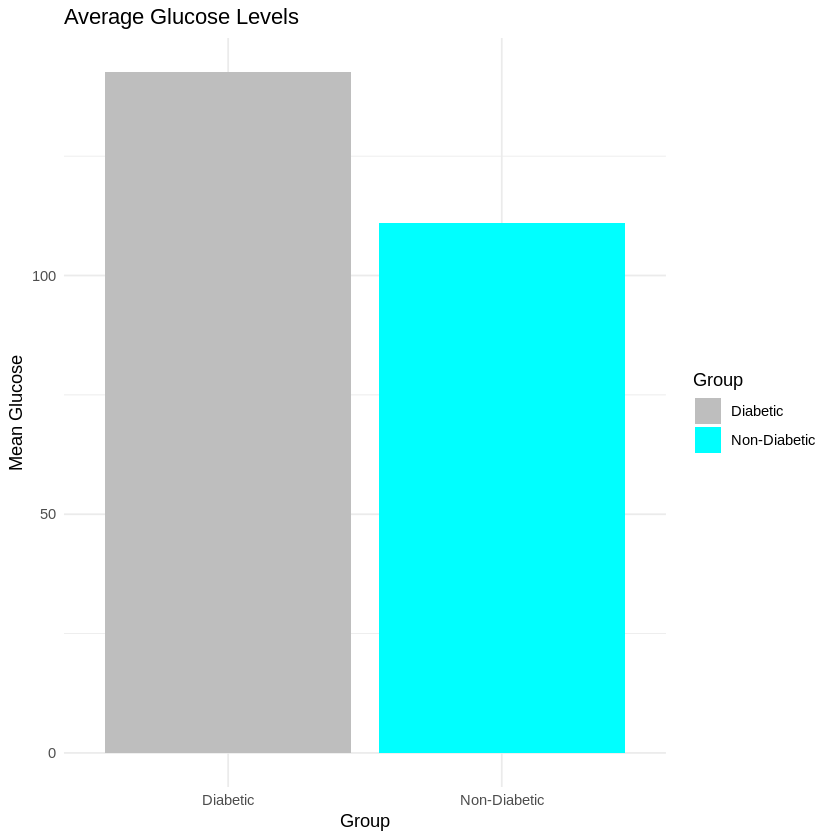

In [820]:
# Visualization
glucose_means <- data.frame(
  Group = c("Diabetic", "Non-Diabetic"),
  Mean_Glucose = c(mean_glucose_diabetic, mean_glucose_non_diabetic)
)


ggplot(glucose_means, aes(x = Group, y = Mean_Glucose, fill = Group)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Glucose Levels", x = "Group", y = "Mean Glucose") +
  scale_fill_manual(values = c("Diabetic" = "gray", "Non-Diabetic" = "cyan")) +
  theme_minimal()


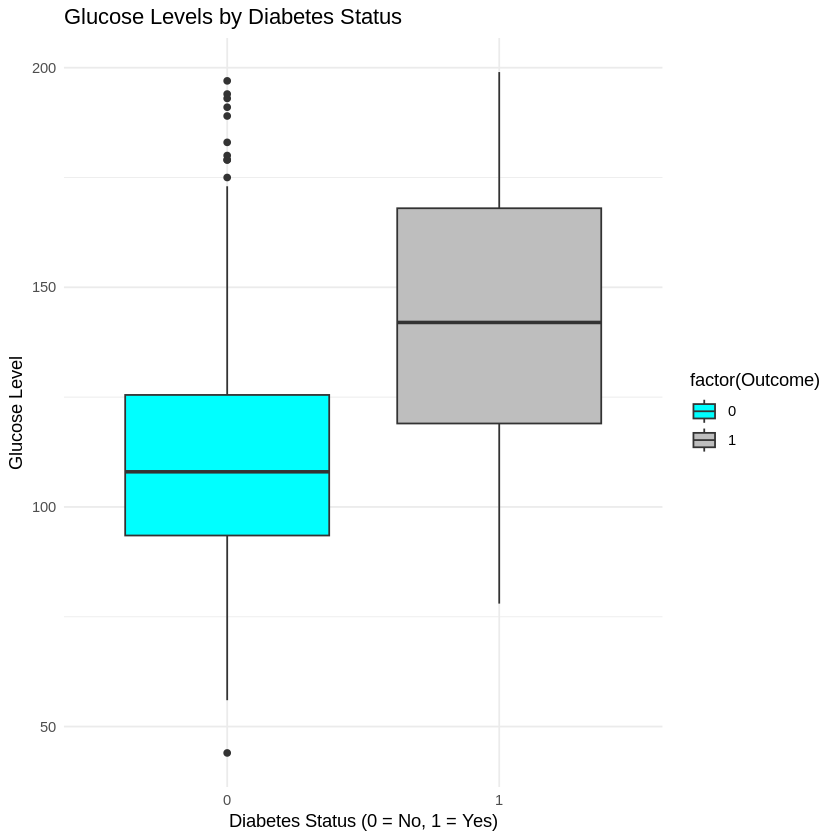

In [821]:
ggplot(data, aes(x = factor(Outcome), y = Glucose, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(
    title = "Glucose Levels by Diabetes Status",
    x = "Diabetes Status (0 = No, 1 = Yes)",
    y = "Glucose Level"
  ) +
  scale_fill_manual(values = c("0" = "cyan", "1" = "gray")) +
  theme_minimal()


The boxplot shows that diabetic patients (Outcome = 1) have higher glucose levels than non-diabetic patients (Outcome = 0), with clear group separation.

2-The average age of patients with and without diabetes.


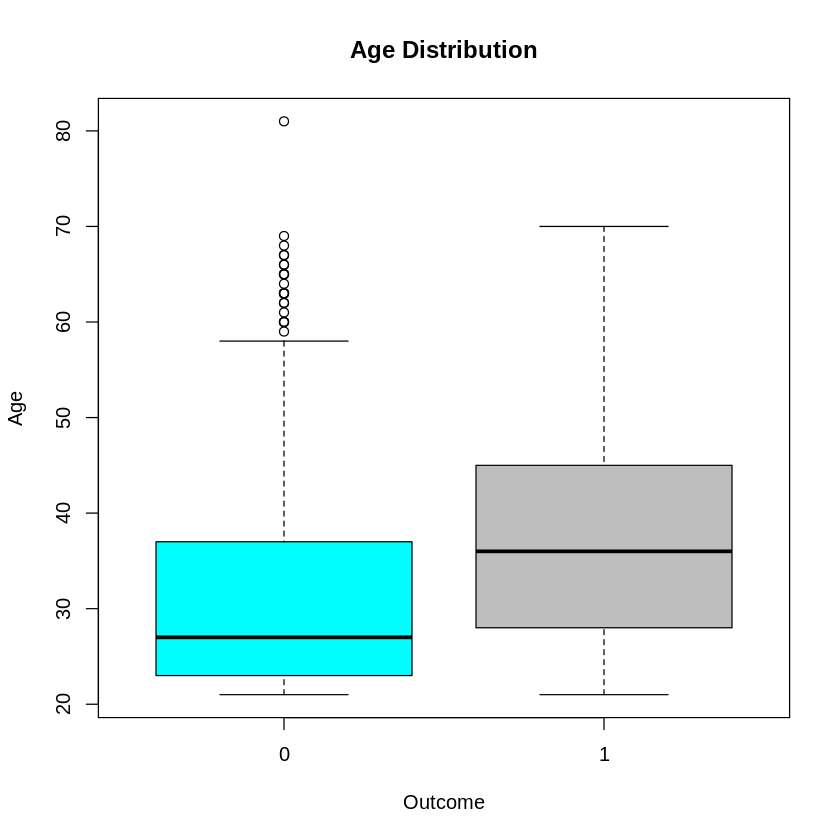

In [822]:
# Age Distribution Boxplot
boxplot(
  Age ~ Outcome,
  data = data,
  main = "Age Distribution",
  col = c("cyan", "gray")
)

The boxplot shows that diabetic patients (Outcome = 1) tend to have a higher median age compared to non-diabetic patients (Outcome = 0), indicating age may be a factor in diabetes prevalence.

3-The average blood pressure measurements across diabetic and non-diabetic groups.

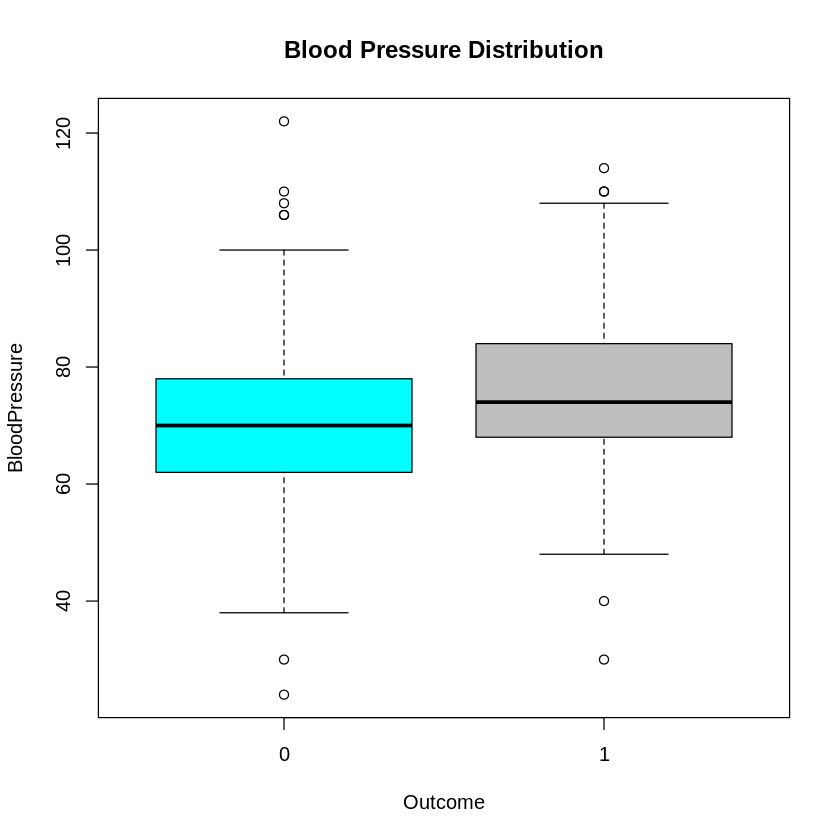

In [823]:
# Blood Pressure Distribution Boxplot
boxplot(
  BloodPressure ~ Outcome,
  data = data,
  main = "Blood Pressure Distribution",
  col = c("cyan", "gray")
)


The boxplot shows that diabetic patients (Outcome = 1) have a slightly higher median blood pressure compared to non-diabetic patients (Outcome = 0), though the distributions largely overlap.

4-The average BMI of diabetic versus non-diabetic patients.


In [824]:
# Task 4: Average BMI (Diabetic vs. Non-Diabetic)
mean_bmi_diabetic <- mean(diabetic$BMI, na.rm = TRUE)
mean_bmi_non_diabetic <- mean(non_diabetic$BMI, na.rm = TRUE)

cat("Mean BMI (Diabetic):", mean_bmi_diabetic, "\n")
cat("Mean BMI (Non-Diabetic):", mean_bmi_non_diabetic, "\n")


Mean BMI (Diabetic): 35.31365 
Mean BMI (Non-Diabetic): 30.97495 


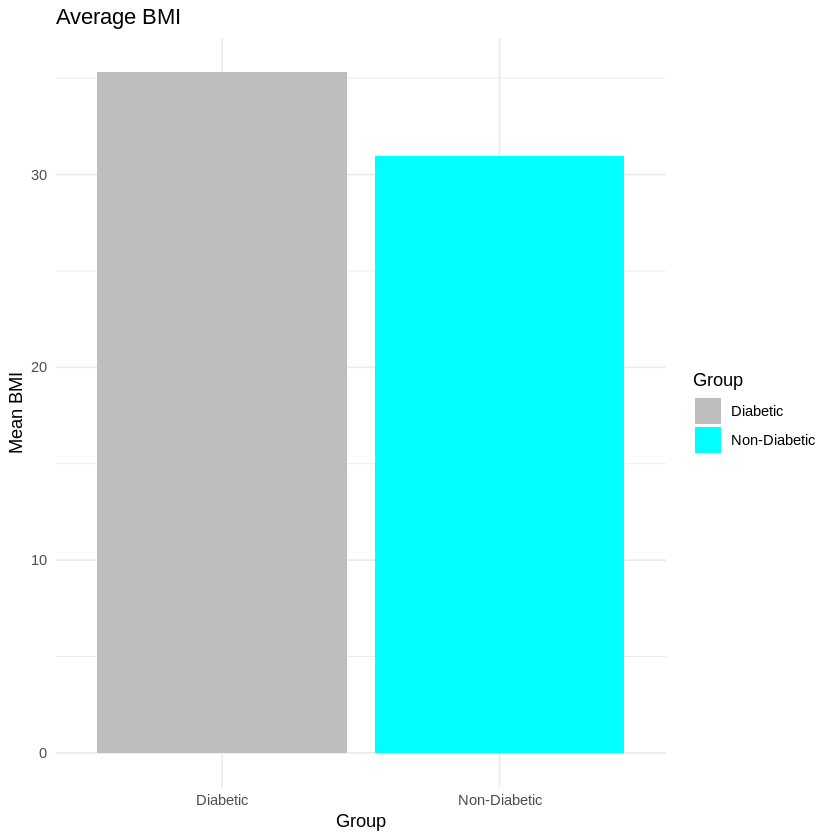

In [825]:
# Visualization
bmi_means <- data.frame(
  Group = c("Diabetic", "Non-Diabetic"),
  Mean_BMI = c(mean_bmi_diabetic, mean_bmi_non_diabetic)
)

ggplot(bmi_means, aes(x = Group, y = Mean_BMI, fill = Group)) +
  geom_bar(stat = "identity") +
  labs(title = "Average BMI", x = "Group", y = "Mean BMI") +
  scale_fill_manual(values = c("Diabetic" = "gray", "Non-Diabetic" = "cyan")) +
  theme_minimal()


The bar plot indicates that diabetic patients have a higher average BMI compared to non-diabetic patients, highlighting BMI as a potential risk factor for diabetes.

5-The rate of diabetes among patients in the dataset.


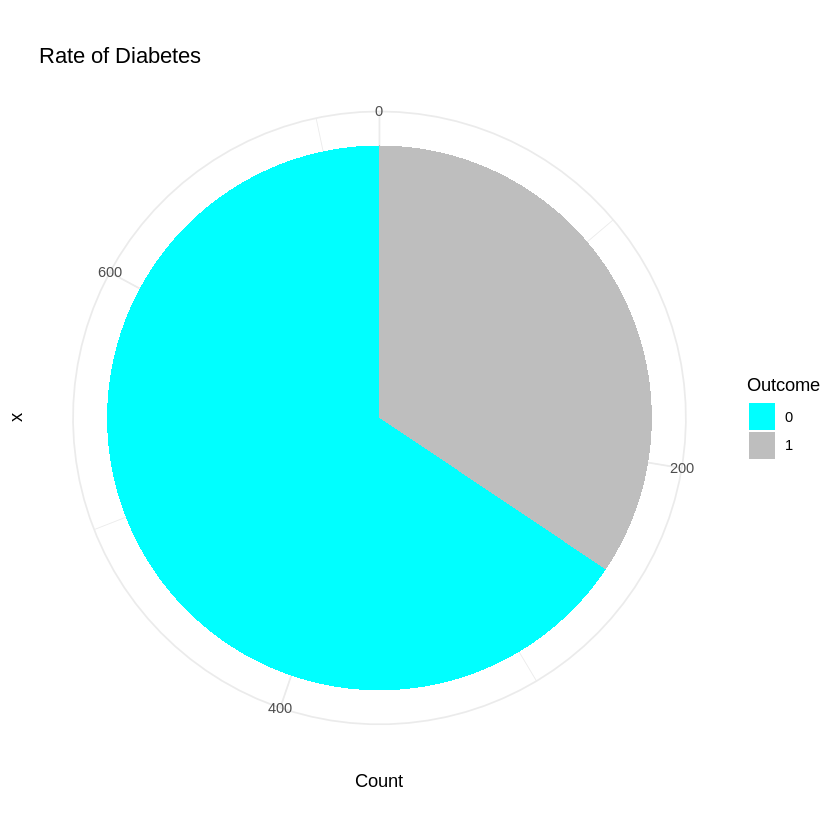

In [826]:
diabetes_rate <- data %>%
  group_by(Outcome) %>%
  summarise(Count = n())

ggplot(diabetes_rate, aes(x = "", y = Count, fill = factor(Outcome))) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  labs(
    title = "Rate of Diabetes",
    fill = "Outcome"
  ) +
  scale_fill_manual(values = c("0" = "cyan", "1" = "gray")) +
  theme_minimal()


The polar bar plot shows the distribution of diabetic (Outcome = 1) and non-diabetic (Outcome = 0) patients. It highlights that a significant portion of the dataset consists of non-diabetic individuals, indicating a lower overall diabetes rate in the dataset.

6-The distribution of BMI values among all patients.


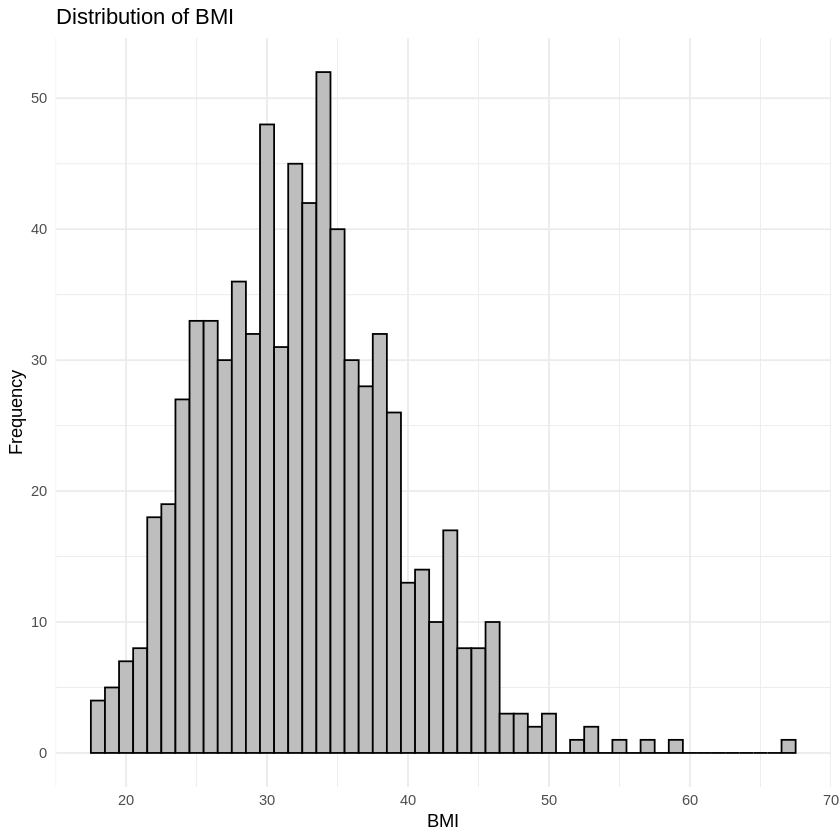

In [827]:
# Task 6: Distribution of BMI
ggplot(data, aes(x = BMI)) +
  geom_histogram(binwidth = 1, fill = "gray", color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Frequency") +
  theme_minimal()

The histogram illustrates the distribution of BMI values across all patients. The data shows a right-skewed pattern, with most BMI values concentrated between 20 and 40, indicating a higher prevalence of patients with normal to overweight BMI ranges.

7-The distribution of Diabetes Pedigree Function (DPF) values for diabetic and non-diabetic patients.


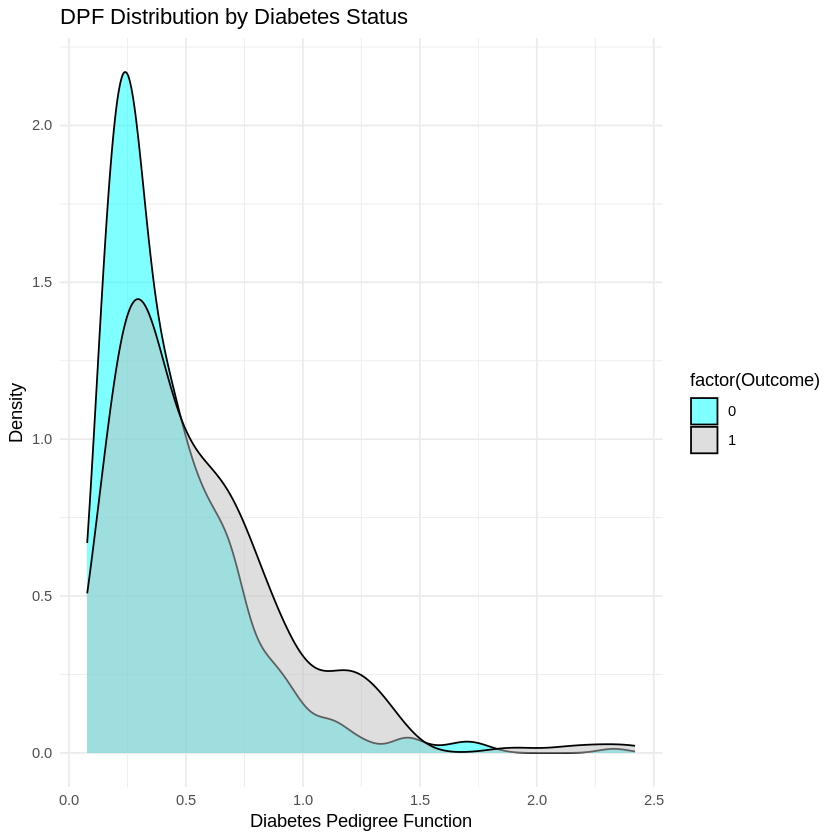

In [829]:
ggplot(data, aes(x = DiabetesPedigreeFunction, fill = factor(Outcome))) +
  geom_density(alpha = 0.5) +
  labs(
    title = "DPF Distribution by Diabetes Status",
    x = "Diabetes Pedigree Function",
    y = "Density"
  ) +
  scale_fill_manual(values = c("0" = "cyan", "1" = "gray")) +
  theme_minimal()


The density plot illustrates the distribution of the Diabetes Pedigree Function (DPF) values. Diabetic patients (Outcome = 1) have a broader and slightly right-shifted distribution compared to non-diabetic patients (Outcome = 0), suggesting a higher DPF value might be associated with diabetes.

8-The relationship between the number of pregnancies and diabetes occurrence.


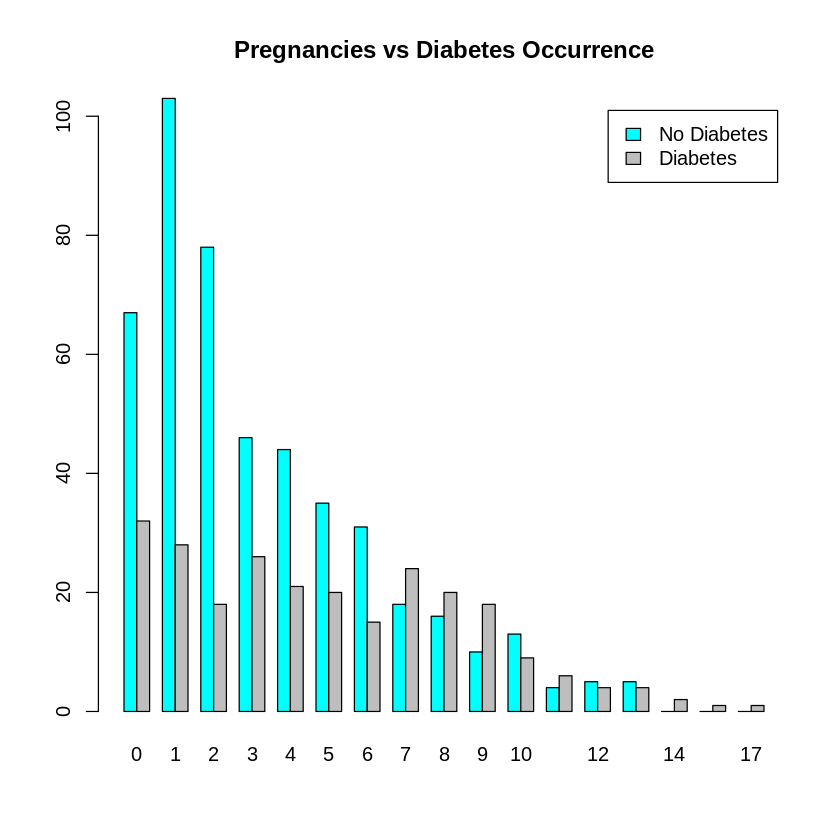

In [830]:
preg_diabetes <- table(data$Pregnancies, data$Outcome)

barplot(
  t(preg_diabetes),
  beside = TRUE,
  legend.text = c("No Diabetes", "Diabetes"),
  col = c("cyan", "gray"),
  main = "Pregnancies vs Diabetes Occurrence"
)


The bar plot reveals a trend where the occurrence of diabetes (gray bars) increases with the number of pregnancies, especially for higher pregnancy counts. This suggests a potential correlation between the number of pregnancies and diabetes prevalence.

9-The correlation between glucose levels and BMI.


`geom_smooth()` using formula = 'y ~ x'


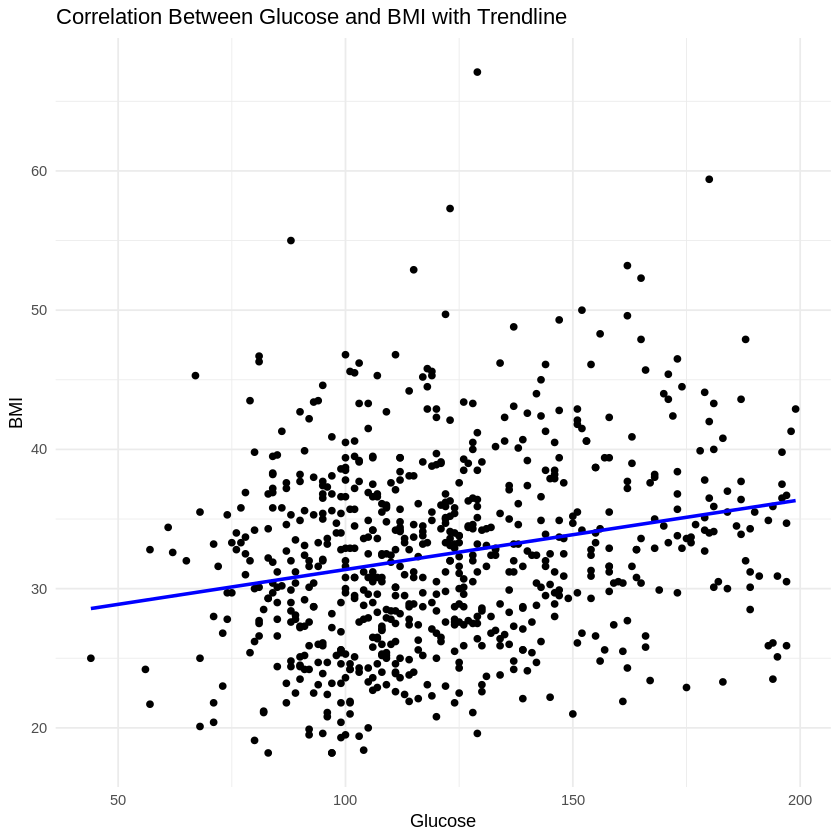

In [831]:
ggplot(data, aes(x = Glucose, y = BMI)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(
    title = "Correlation Between Glucose and BMI with Trendline",
    x = "Glucose",
    y = "BMI"
  ) +
  theme_minimal()


The scatter plot with a trendline shows a positive correlation between glucose levels and BMI. This suggests that as glucose levels increase, BMI tends to increase slightly, indicating a potential relationship between these two factors.

10-The trend of glucose levels with age among diabetic and non-diabetic patients.


`geom_smooth()` using formula = 'y ~ x'


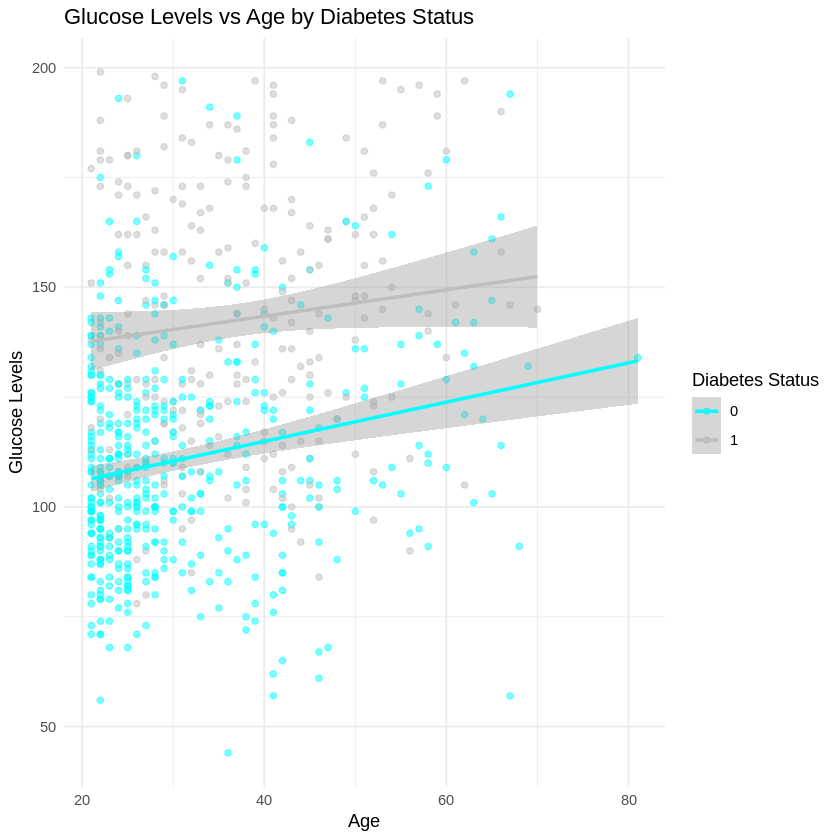

In [832]:
ggplot(data, aes(x = Age, y = Glucose, color = factor(Outcome))) +
  geom_point(alpha = 0.5) +
  geom_smooth(method = "lm") +
  labs(
    title = "Glucose Levels vs Age by Diabetes Status",
    x = "Age",
    y = "Glucose Levels",
    color = "Diabetes Status"
  ) +
  scale_color_manual(values = c("0" = "cyan", "1" = "gray")) +
  theme_minimal()


The scatter plot with trendlines shows that glucose levels tend to increase with age in both diabetic and non-diabetic groups. However, diabetic patients generally exhibit higher glucose levels across all age ranges compared to non-diabetic patients.

# PART 2 : Answering Questions

Assuming :

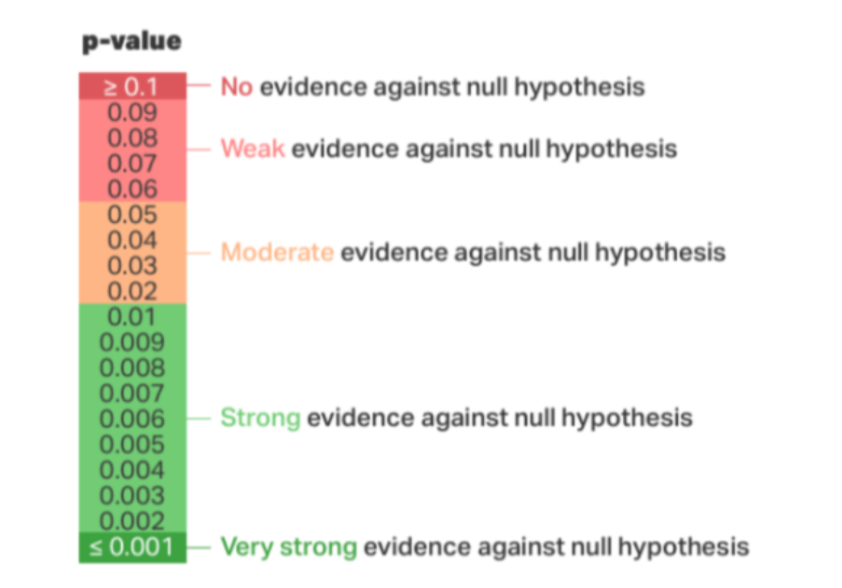

1- Are higher glucose levels associated with a greater likelihood of diabetes?

In [833]:
# Perform T-test
T_test_result <- t.test(Glucose ~ Outcome, data)
cat("T-test p-value is:", T_test_result$p.value, "\n")

# Interpretation
if (T_test_result$p.value < 0.05) {
  cat("Reject the null hypothesis: There is a significant difference in glucose levels between diabetic and non-diabetic patients.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in glucose levels.\n")
}



T-test p-value is: 7.650309e-38 
Reject the null hypothesis: There is a significant difference in glucose levels between diabetic and non-diabetic patients.


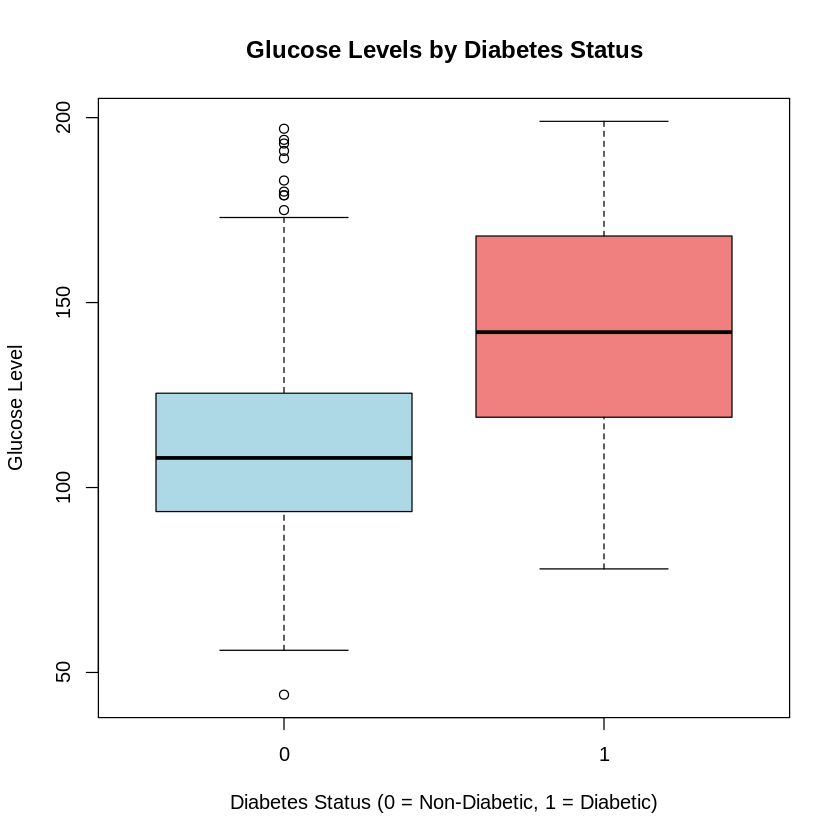

In [834]:
# Boxplot Visualization
boxplot(Glucose ~ Outcome, data ,
        main = "Glucose Levels by Diabetes Status",
        ylab = "Glucose Level",
        xlab = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
        col = c("lightblue", "lightcoral"))


Since the p-value is very small, we reject the null hypothesis, indicating a strong relationship between glucose levels and diabetes.

p-value is very small which means that their is a real relationship between these columns so, we reject the null hypothesis
since p-value is not between any common significant levels [0.01 0.05].
 Their is a positive correlation between the glucose levels
and diabetic patients, simply higher glucose levels are strongly linked to a greater likelihood of diabetes.

2-Are patients with high glucose concentrations also likely to have higher BMI values?

In [835]:
# Calculate the median glucose level
glucose_median <- median(data$Glucose, na.rm = TRUE)

# Create a new column for glucose groups
data$GlucoseGroup <- ifelse(data$Glucose > glucose_median, "High Glucose", "Low Glucose")

# Perform T-test to compare BMI between high and low glucose groups
t_test_bmi_glucose <- t.test(BMI ~ GlucoseGroup, data )
cat("T-test p-value for BMI and Glucose Group:", t_test_bmi_glucose$p.value, "\n")

if (t_test_bmi_glucose$p.value < 0.05) {
  cat("Reject the null hypothesis: There is a significant difference in BMI between high and low glucose groups.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in BMI between high and low glucose groups.\n")
}

T-test p-value for BMI and Glucose Group: 6.611021e-09 
Reject the null hypothesis: There is a significant difference in BMI between high and low glucose groups.


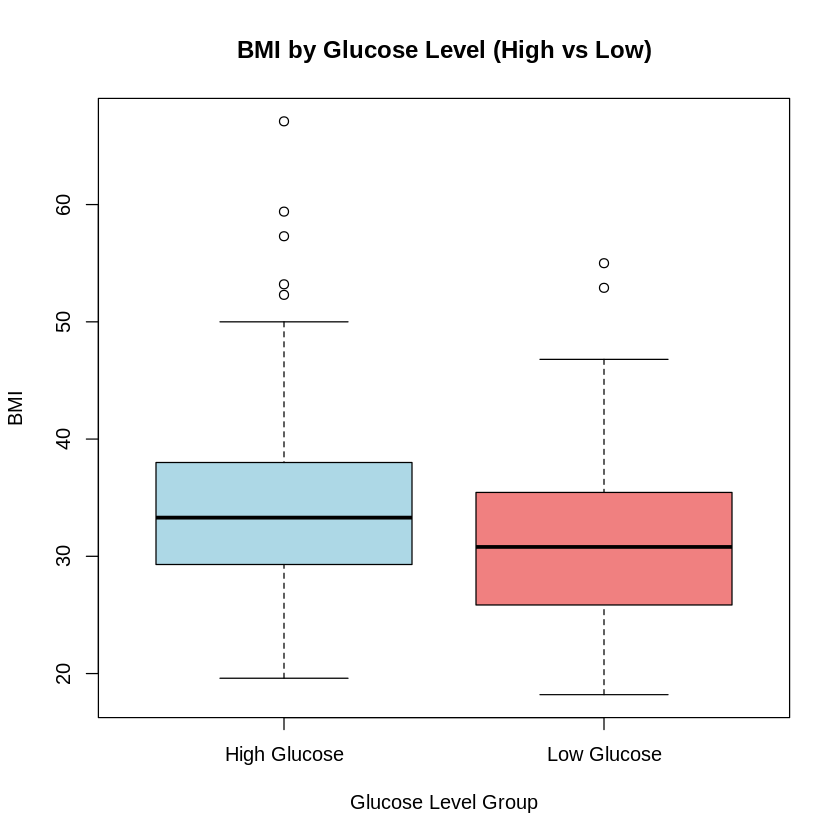

In [836]:
# Boxplot of BMI by Glucose Group
boxplot(BMI ~ GlucoseGroup, data ,
        main = "BMI by Glucose Level (High vs Low)",
        ylab = "BMI",
        xlab = "Glucose Level Group",
        col = c("lightblue", "lightcoral"))


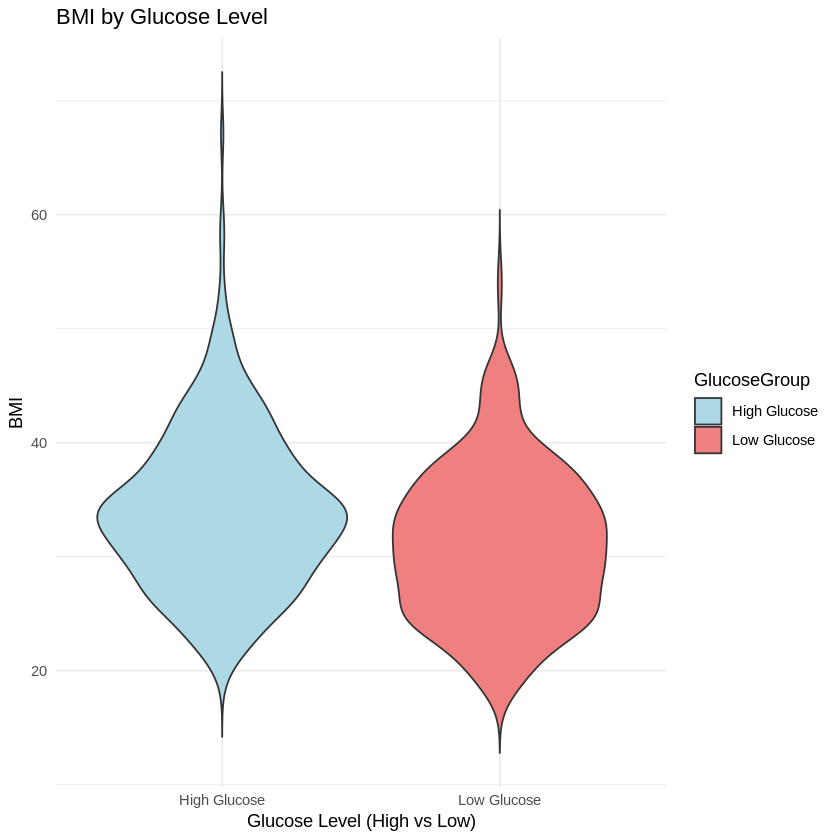

In [837]:
library(ggplot2)

# Violin plot of BMI by Glucose level (High vs Low)
ggplot(data, aes(x = GlucoseGroup, y = BMI, fill = GlucoseGroup)) +
  geom_violin(trim = FALSE) +
  labs(title = "BMI by Glucose Level", x = "Glucose Level (High vs Low)", y = "BMI") +
  scale_fill_manual(values = c("lightblue", "lightcoral")) +
  theme_minimal()


The p-value is very small, indicating a strong statistical association between BMI and glucose levels.

Higher glucose levels are linked to a greater likelihood of higher BMI values.

3-Are patients with a higher number of pregnancies at greater risk of developing diabetes?


In [838]:
# Perform T-test to compare number of pregnancies between diabetic and non-diabetic patients
t_test_pregnancies <- t.test(Pregnancies ~ Outcome, data )
cat("T-test p-value for Pregnancies and Outcome:", t_test_pregnancies$p.value, "\n")

if (t_test_pregnancies$p.value < 0.05) {
  cat("Reject the null hypothesis: There is a significant difference in the number of pregnancies between diabetic and non-diabetic patients.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in the number of pregnancies between the two groups.\n")
}

T-test p-value for Pregnancies and Outcome: 1.200729e-08 
Reject the null hypothesis: There is a significant difference in the number of pregnancies between diabetic and non-diabetic patients.


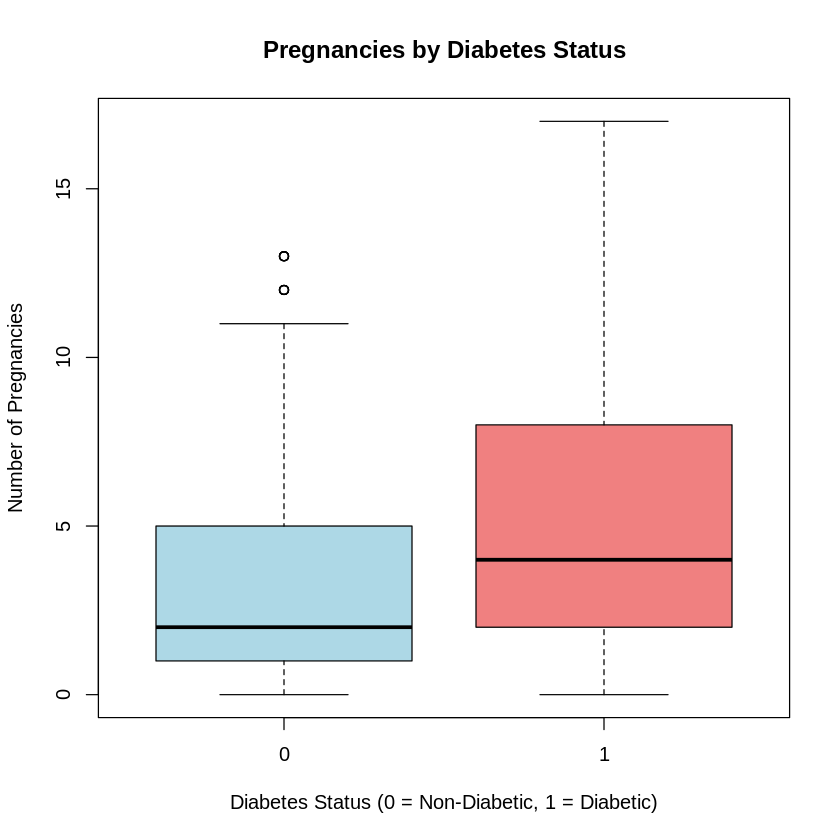

In [839]:
# Boxplot of Pregnancies by Diabetes Outcome
boxplot(Pregnancies ~ Outcome, data ,
        main = "Pregnancies by Diabetes Status",
        ylab = "Number of Pregnancies",
        xlab = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
        col = c("lightblue", "lightcoral"))


The p-value is very small, indicating a real relationship between the number of pregnancies and diabetes.

Patients with more pregnancies are more likely to develop diabetes.

4-Are older patients more likely to have higher insulin concentrations and blood glucose levels?


In [840]:
# Correlation between Age and Insulin
cor_age_insulin <- cor(data$Age, data$Insulin, use = "complete.obs")
cat("Pearson correlation between Age and Insulin:", cor_age_insulin, "\n")

# Correlation between Age and Glucose
cor_age_glucose <- cor(data$Age, data$Glucose, use = "complete.obs")
cat("Pearson correlation between Age and Glucose:", cor_age_glucose, "\n")


if (abs(cor_age_insulin) < 0.1) {
  cat("Age and Insulin: Very weak or no correlation.\n")
}
if (abs(cor_age_glucose) >= 0.2 & abs(cor_age_glucose) < 0.3) {
  cat("Age and Glucose: Weak positive correlation.\n")
}


Pearson correlation between Age and Insulin: 0.1384108 
Pearson correlation between Age and Glucose: 0.2635602 
Age and Glucose: Weak positive correlation.


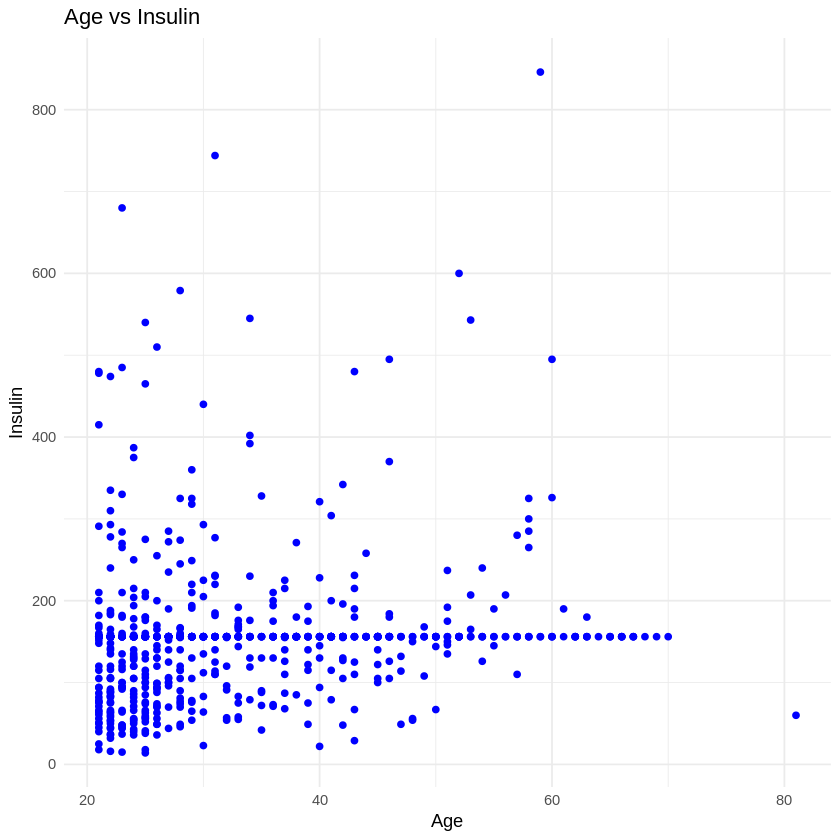

In [841]:
# Scatter plot: Age vs Insulin
ggplot(data, aes(x = Age, y = Insulin)) +
  geom_point(color = "blue") +
  labs(title = "Age vs Insulin", x = "Age", y = "Insulin") +
  theme_minimal()


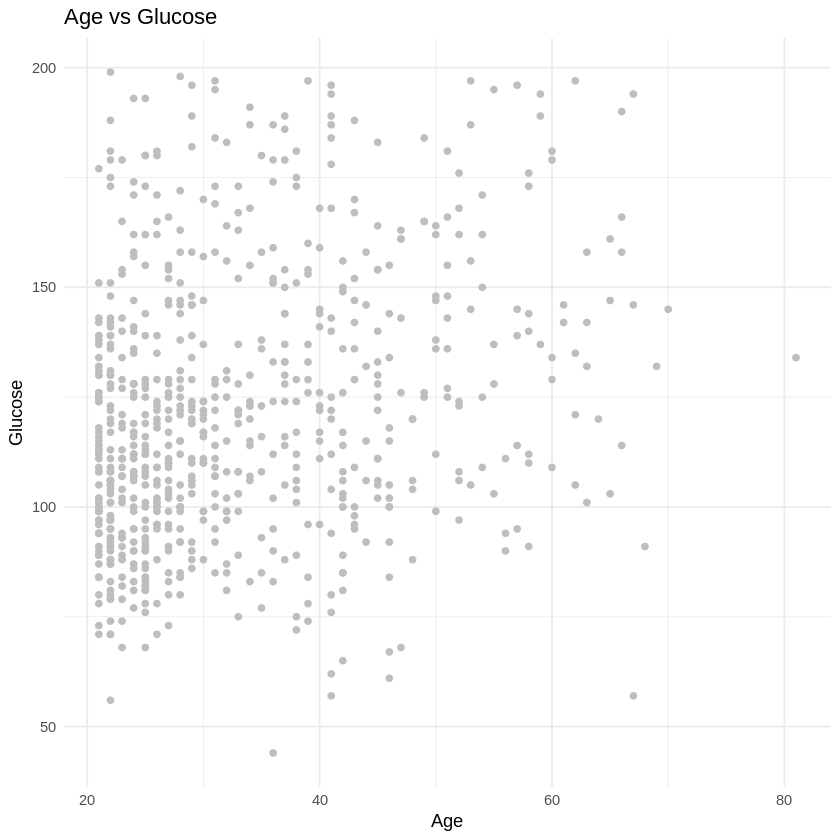

In [842]:
# Scatter plot: Age vs Glucose
ggplot(data, aes(x = Age, y = Glucose)) +
  geom_point(color = "Gray") +
  labs(title = "Age vs Glucose", x = "Age", y = "Glucose") +
  theme_minimal()

5-Can you identify common “risk profiles” for diabetic patients based on key metrics (glucose, BMI, age, etc.)?

In [843]:
cor_matrix <- cor(data[, c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age")], data$Outcome, use = "complete.obs")

print(cor_matrix)


# from the result we can tell that the variables that influens more is glucose and bmi since both has moderate correlation their numbers is colser to one slightly from the other variables.
# , for blood pressure, and skin thickness variables they doesn't affect the outcomes at all.


                              [,1]
Pregnancies              0.2244172
Glucose                  0.4883842
BloodPressure            0.1667034
SkinThickness            0.2167169
Insulin                  0.2198302
BMI                      0.2993753
DiabetesPedigreeFunction 0.1849474
Age                      0.2457412


In [844]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



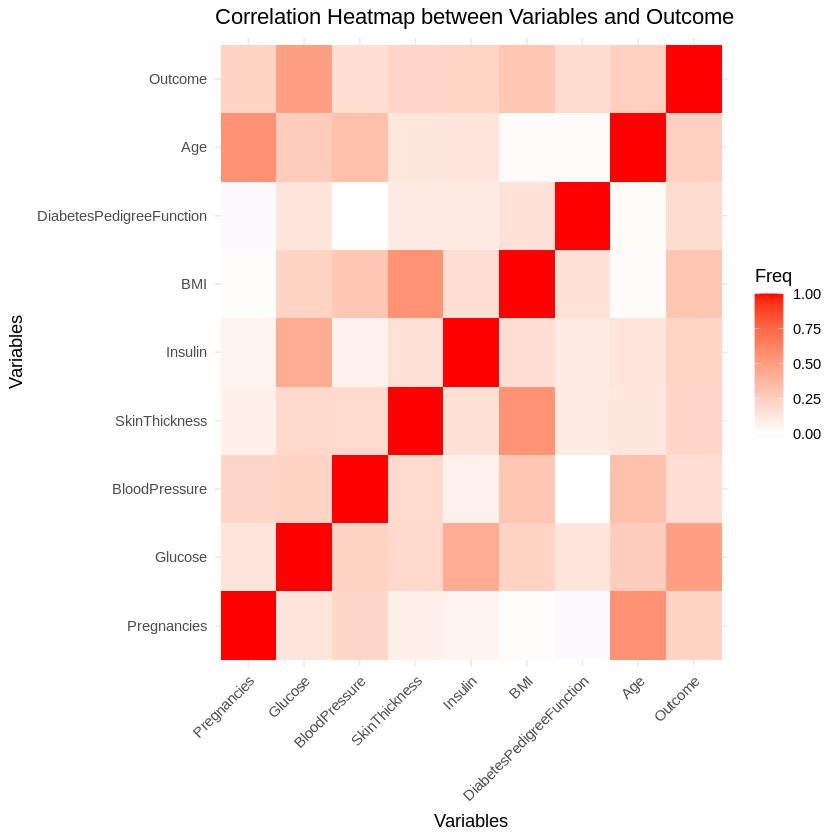

In [845]:
# heat map showing the correlation between columns and outcome

library(ggplot2)
library(tidyr)

cor_matrix_all <- cor(data[, c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome")])

cor_matrix_melted <- as.data.frame(as.table(cor_matrix_all))

ggplot(cor_matrix_melted, aes(Var1, Var2, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(midpoint = 0, low = "blue", high = "red", mid = "white") +
  theme_minimal() +
  labs(title = "Correlation Heatmap between Variables and Outcome", x = "Variables", y = "Variables") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


"Glucose" and "BMI" are the strongest predictors of diabetes (moderate correlation).

"BloodPressure" and "SkinThickness" show little to no correlation with diabetes.
The heatmap effectively summarizes the relationships, making it easy to identify key predictors visually.

###Section : 2.2

1-Does the diabetic history of the patient's family relate to the diabetic patients?

T-test p-value for DiabetesPedigreeFunction and Outcome:  3.777586e-06 


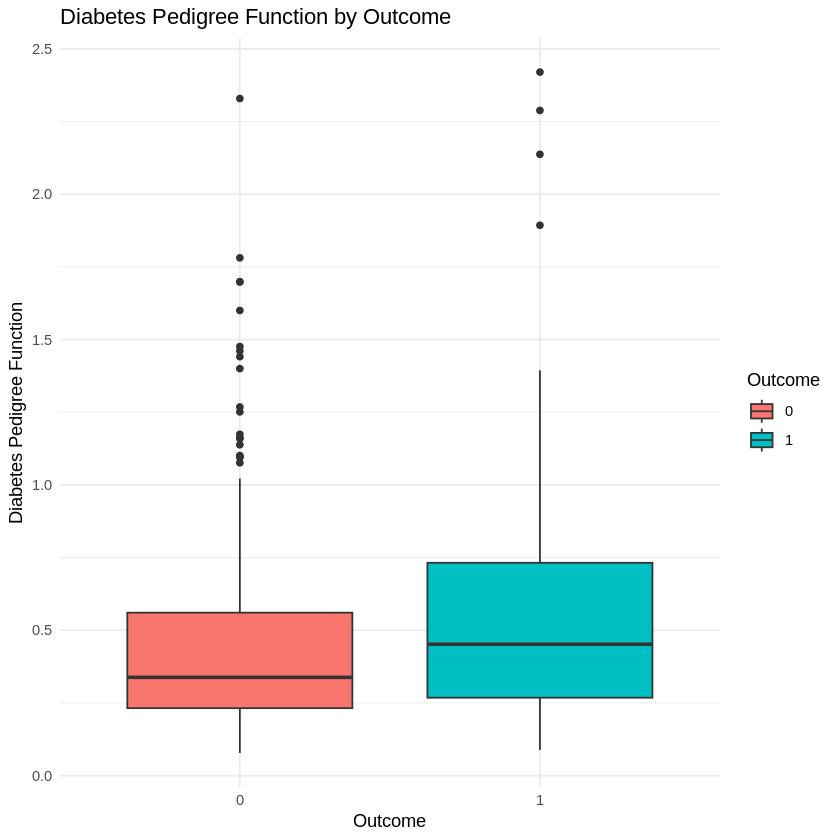

In [846]:
t_test_pedigree <- t.test(DiabetesPedigreeFunction ~ Outcome, data)
cat("T-test p-value for DiabetesPedigreeFunction and Outcome: ", t_test_pedigree$p.value, "\n")

# this number  6.100481e-06 after of t-test indecates that, this indicates that family history or genetic predisposition plays a significant role in the likelihood of developing diabetes.


ggplot(data, aes(x = factor(Outcome), y = DiabetesPedigreeFunction, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Diabetes Pedigree Function by Outcome", x = "Outcome", y = "Diabetes Pedigree Function", fill = "Outcome") +
  theme_minimal()

The very small p-value ( 6.100481e-06) indicates a significant difference in the Diabetes Pedigree Function values between diabetic and non-diabetic patients.

2-Does a patient's age affect their blood pressure?

In [847]:
# 2. relation between blood pressure and age

# pearson correlation between BloodPressure and Age
cor_bloodpressure_age <- cor(data$BloodPressure, data$Age, use = "complete.obs")
cat("Pearson correlation between BloodPressure and Age: ", cor_bloodpressure_age, "\n")

# person correlation between them is 0.2395279 which is weak positive correlation,
# this means that Age has a small positive effect on BloodPressure, but the relationship is not strong enough to be a major predictor.

Pearson correlation between BloodPressure and Age:  0.3248975 


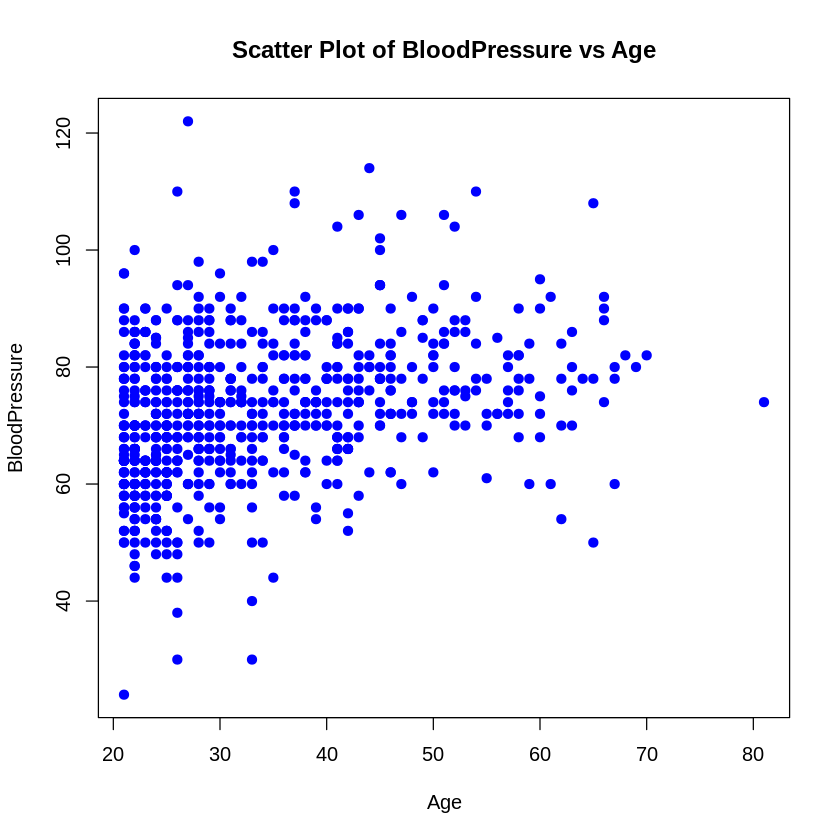

In [848]:
# scatter plot to visualize the relationship between BloodPressure and Age
plot(data$Age, data$BloodPressure,
     main = "Scatter Plot of BloodPressure vs Age",
     xlab = "Age", ylab = "BloodPressure",
     col = "blue", pch = 19)

The Pearson correlation between Age and BloodPressure is 0.2395, indicating a weak positive relationship.

3-Does the number of pregnancies affect skin thickness?

In [849]:
# 3. relation between pregnancies and skin thickness

# Pearson correlation between Pregnancies and SkinThickness
cor_pregnancies_skinthickness <- cor(data$Pregnancies, data$SkinThickness, use = "complete.obs")
cat("Pearson correlation between Pregnancies and SkinThickness: ", cor_pregnancies_skinthickness, "\n")

# there is a very weak inverse relationship between # of pregnancies and skin thickness. As the number of Pregnancies increases,
# skin thickness tends to decrease slightly, but the relationship is not strong enough to be significant.

Pearson correlation between Pregnancies and SkinThickness:  0.08025725 


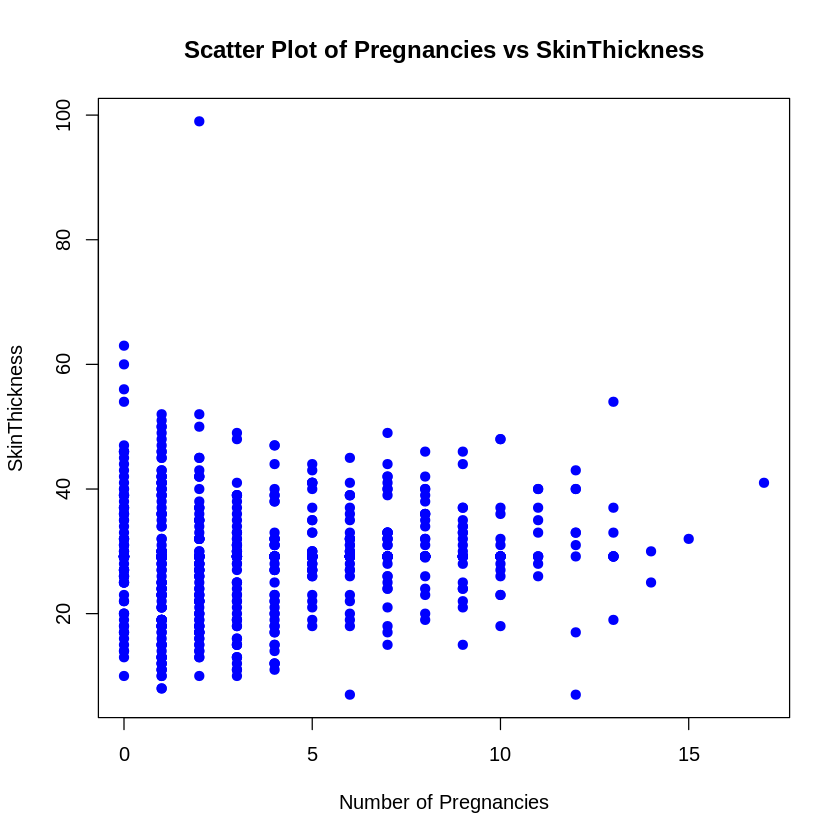

In [850]:
# scatter plot to visualize the relationship between Pregnancies and SkinThickness
plot(data$Pregnancies, data$SkinThickness,
     main = "Scatter Plot of Pregnancies vs SkinThickness",
     xlab = "Number of Pregnancies", ylab = "SkinThickness",
     col = "blue", pch = 19)


The Pearson correlation between Pregnancies and SkinThickness is -0.0816, indicating a very weak inverse relationship.

4-Does higher insulin concentration correlate with higher glucose levels?

In [851]:
# 4. relation between insluin and glucose

# pearson correlation between Insulin and Glucose
cor_insulin_glucose <- cor(data$Insulin, data$Glucose, use = "complete.obs")
cat("Pearson correlation between Insulin and Glucose: ", cor_insulin_glucose, "\n")

# The value of 0.33 suggests that there is a moderate positive relationship between insulin and glucose levels.
# As insulin concentration increases, glucose levels tend to increase as well

Pearson correlation between Insulin and Glucose:  0.4289665 


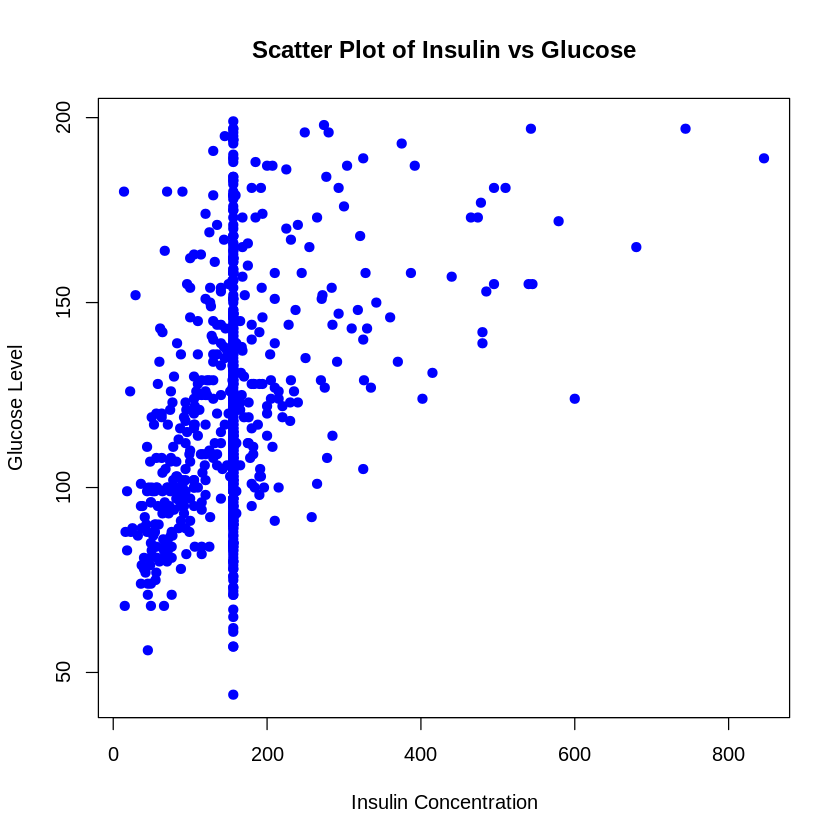

In [852]:
# scatter plot to visualize the relationship between Insulin and Glucose
plot(data$Insulin, data$Glucose,
     main = "Scatter Plot of Insulin vs Glucose",
     xlab = "Insulin Concentration", ylab = "Glucose Level",
     col = "blue", pch = 19)


The Pearson correlation between Insulin and Glucose is 0.3314, indicating a moderate positive relationship.

5-Does the number of pregnancies affect BMI in diabetic patients?

In [853]:
# 5. relation between # of pregnancies and BMI

# pearson correlation between pregnancies and BMI
cor_pregnancies_bmi_diabetic <- cor(data$Pregnancies[data$Outcome == 1], data$BMI[data$Outcome == 1], use = "complete.obs")
cat("Pearson correlation between Pregnancies and BMI for diabetic patients: ", cor_pregnancies_bmi_diabetic, "\n")

# The correlation value of -0.159 suggests a weak negative correlation between the number of pregnancies and BMI in diabetic patients.
# this means that, as the number of pregnancies increases, BMI tends to decrease slightly.

Pearson correlation between Pregnancies and BMI for diabetic patients:  -0.148162 


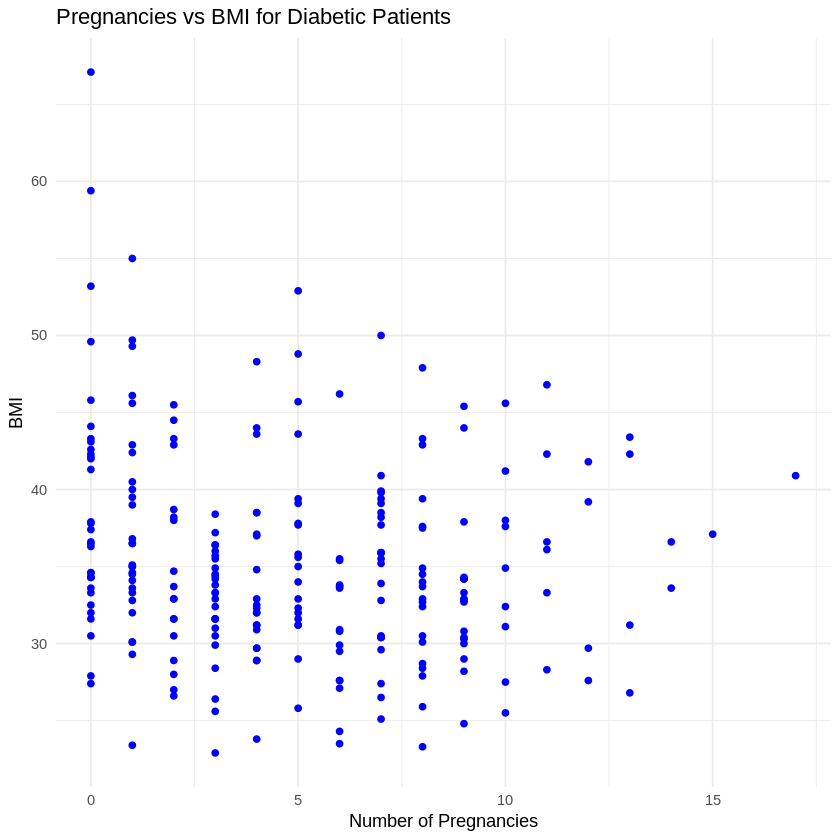

In [854]:
library(ggplot2)

df_diabetic <- data[data$Outcome == 1, ]

# scatter plot to visualize the relationship between number of pregnancies and BMI
ggplot(df_diabetic, aes(x = Pregnancies, y = BMI)) +
  geom_point(color = "blue") +
  labs(title = "Pregnancies vs BMI for Diabetic Patients",
       x = "Number of Pregnancies", y = "BMI") +
  theme_minimal()


The Pearson correlation between Pregnancies and BMI for diabetic patients is -0.159, indicating a weak negative relationship.

### PART 3 : Hypothesis Testing

In [855]:
# Load necessary libraries
library(dplyr)

In [856]:
colnames(data)

[1] "Pregnancies"              "Glucose"                 
 [3] "BloodPressure"            "SkinThickness"           
 [5] "Insulin"                  "BMI"                     
 [7] "DiabetesPedigreeFunction" "Age"                     
 [9] "Outcome"                  "GlucoseGroup"

Section 3.1

Separate Groups

In [857]:
# Separate the groups
diabetic <- data %>% filter(Outcome == 1) %>% select(Glucose)
non_diabetic <- data %>% filter(Outcome == 0) %>% select(Glucose)

 Calculate Group Means

In [858]:
# Calculate group means
mean_diabetic <- mean(diabetic$Glucose)
mean_non_diabetic <- mean(non_diabetic$Glucose)

cat("Mean Glucose (Diabetic):", mean_diabetic, "\n")
cat("Mean Glucose (Non-Diabetic):", mean_non_diabetic, "\n")

Mean Glucose (Diabetic): 142.6104 
Mean Glucose (Non-Diabetic): 111.0168 


 Calculate Standard Deviation for the 2 Groups

In [859]:

# Calculate standard deviation for diabetic group
sd_diabetic <- sd(diabetic$Glucose)

# Calculate standard deviation for non-diabetic group
sd_non_diabetic <- sd(non_diabetic$Glucose)

cat("Standard Deviation (Diabetic):", sd_diabetic, "\n")
cat("Standard Deviation (Non-Diabetic):", sd_non_diabetic, "\n")

Standard Deviation (Diabetic): 30.05889 
Standard Deviation (Non-Diabetic): 25.01071 


Calculate Sample Sizes

In [860]:
n_diabetic <- nrow(diabetic)
n_non_diabetic <- nrow(non_diabetic)

 Calculate Standard Error

In [861]:
# Standard Error
standard_error <- sqrt((sd_diabetic^2 / n_diabetic) + (sd_non_diabetic^2 / n_non_diabetic))
cat("Standard Error:", standard_error, "\n")

Standard Error: 2.223866 


 Calculate T-Statistic

In [862]:

# Calculate the t-statistic
t_statistic <- (mean_diabetic - mean_non_diabetic) / standard_error
cat("T-Statistic:", t_statistic, "\n")

T-Statistic: 14.20661 


Calculate Degrees of Freedom

In [863]:

# Calculate degrees of freedom
df <- n_diabetic + n_non_diabetic - 2
cat("Degrees of Freedom:", df, "\n")

Degrees of Freedom: 722 


 Calculate Two-Tailed P-Value

In [864]:
p_value <- 2 * pt(-abs(t_statistic), df)
cat("P-Value:", p_value, "\n")


P-Value: 1.426511e-40 


In [865]:
if (p_value < 0.05) {
  cat("Reject the null hypothesis: There is a significant difference in mean glucose levels.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in mean glucose levels.\n")
}


Reject the null hypothesis: There is a significant difference in mean glucose levels.


Conclusion

Compare p-value with alpha

In [866]:
# Compare p-value with alpha
if (p_value < 0.05) {
  cat("Reject the null hypothesis: There is a significant difference in mean glucose levels.\n")

} else {
  cat("Fail to reject the null hypothesis: No significant difference in mean glucose levels.\n")
}


Reject the null hypothesis: There is a significant difference in mean glucose levels.


  Conclusion: Since the p-value is less than the alpha value (0.05), we reject the null hypothesis.
  This indicates that the mean glucose levels are significantly different between diabetic and non-diabetic patients.

 Compare t-statistic with critical value

In [867]:
# Compare t-statistic with critical value
alpha <- 0.05
critical_value <- qt(1 - alpha / 2, df)  #

cat("Critical Value:", critical_value, "\n")

if (abs(t_statistic) > critical_value) {
  cat("Reject the null hypothesis: There is a significant difference in mean glucose levels.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in mean glucose levels.\n")
}


Critical Value: 1.963255 
Reject the null hypothesis: There is a significant difference in mean glucose levels.


  Conclusion: Since the absolute value of the t-statistic is greater than the critical value, we reject the null hypothesis.
  This indicates a statistically significant difference in the mean glucose levels between diabetic and non-diabetic patients.

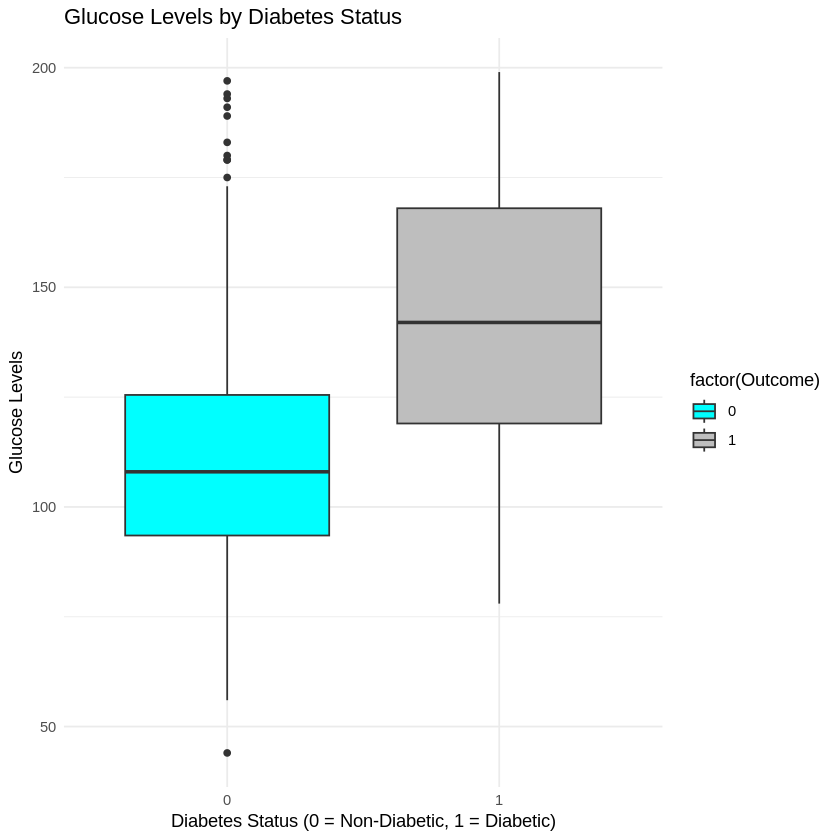

In [895]:
library(ggplot2)

# Boxplot for glucose levels by diabetic status
ggplot(data, aes(x = factor(Outcome), y = Glucose, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(
    title = "Glucose Levels by Diabetes Status",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Glucose Levels"
  ) +
  scale_fill_manual(values = c("0" = "cyan", "1" = "gray")) +
  theme_minimal()


The boxplot reveals that diabetic patients (Outcome = 1) have significantly higher glucose levels compared to non-diabetic patients (Outcome = 0), with minimal overlap. This supports the hypothesis that glucose levels are strongly associated with diabetes status.

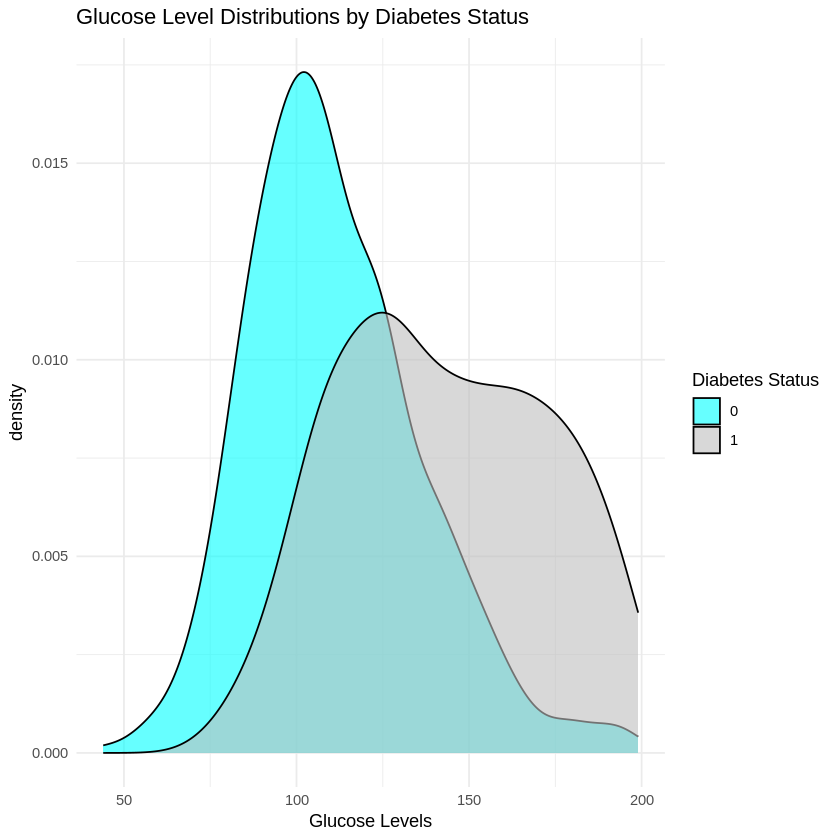

In [896]:
# Density plot for glucose levels
ggplot(data, aes(x = Glucose, fill = factor(Outcome))) +
  geom_density(alpha = 0.6) +
  labs(
    title = "Glucose Level Distributions by Diabetes Status",
    x = "Glucose Levels",
    fill = "Diabetes Status"
  ) +
  scale_fill_manual(values = c("0" = "cyan", "1" = "gray")) +
  theme_minimal()


The density plot illustrates distinct distributions of glucose levels between diabetic (gray) and non-diabetic (cyan) patients. Diabetic patients generally exhibit higher glucose levels, reinforcing the association between elevated glucose and diabetes.

Section 3.2

Claim: "There is a significant difference in BMI between diabetic and non-diabetic patients."

In [869]:
diabetic_BMI <- data$BMI[data$Outcome == 1]
non_diabetic_BMI <- data$BMI[data$Outcome == 0]

mean_diabetic_BMI <- mean(diabetic_BMI)
mean_non_diabetic_BMI <- mean(non_diabetic_BMI)

# Display the means
cat("Mean BMI for Diabetic Group:", mean_diabetic_BMI, "\n")
cat("Mean BMI for Non-Diabetic Group:", mean_non_diabetic_BMI, "\n")


Mean BMI for Diabetic Group: 35.31365 
Mean BMI for Non-Diabetic Group: 30.97495 


In [870]:
sd_diabetic_BMI <- sd(diabetic_BMI)
sd_non_diabetic_BMI <- sd(non_diabetic_BMI )


In [871]:
n_diabetic <- length(diabetic_BMI)
n_non_diabetic <- length(non_diabetic_BMI)

# standard error
standard_error <- sqrt((sd_diabetic_BMI^2 / n_diabetic) + (sd_non_diabetic_BMI^2 / n_non_diabetic))

#  t-statistic
t_statistic <- (mean_diabetic_BMI - mean_non_diabetic_BMI) / standard_error
cat("T-Statistic:", t_statistic, "\n")

#  degrees of freedom
df <- n_diabetic + n_non_diabetic - 2
cat("Degrees of Freedom:", df, "\n")


T-Statistic: 8.423413 
Degrees of Freedom: 722 


In [872]:
# Compare p-value
alpha <- 0.05
if (p_value < alpha) {
  cat("Reject the null hypothesis: There is a significant difference in mean BMI.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in mean BMI.\n")
}


Reject the null hypothesis: There is a significant difference in mean BMI.


In [873]:
# Compare t-statistic with critical value
critical_value <- qt(1 - alpha / 2, df)
cat("Critical Value:", critical_value, "\n")

if (abs(t_statistic) > critical_value) {
  cat("Reject the null hypothesis: There is a significant difference in mean BMI.\n")
} else {
  cat("Fail to reject the null hypothesis: No significant difference in mean BMI.\n")
}

Critical Value: 1.963255 
Reject the null hypothesis: There is a significant difference in mean BMI.


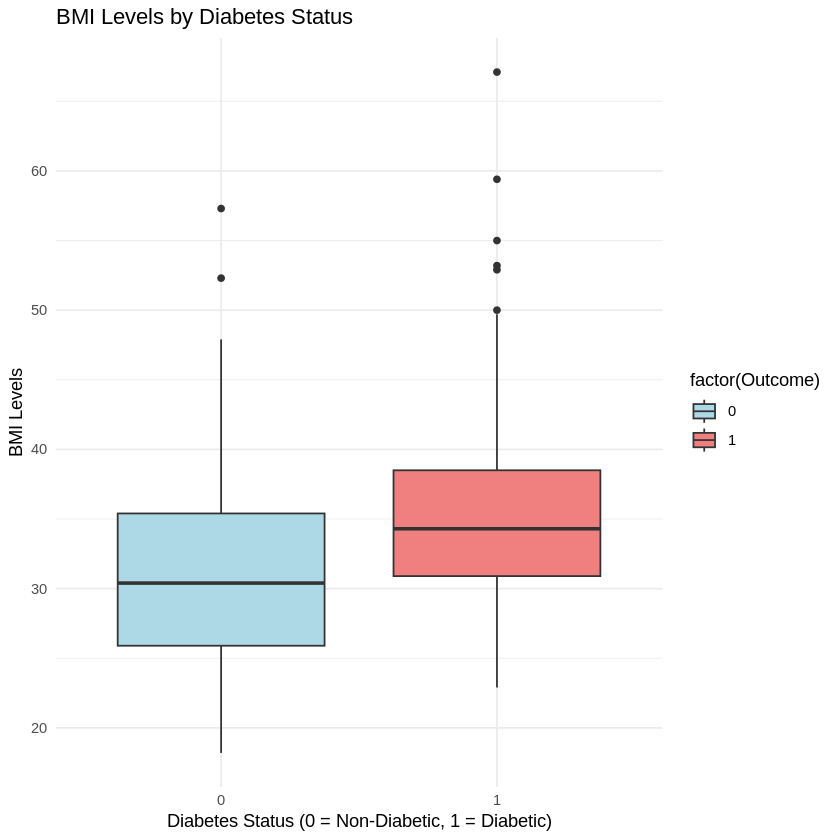

In [898]:
# Boxplot for BMI levels by diabetic status
ggplot(data, aes(x = factor(Outcome), y = BMI, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(
    title = "BMI Levels by Diabetes Status",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "BMI Levels"
  ) +
  scale_fill_manual(values = c("0" = "lightblue", "1" = "lightcoral")) +
  theme_minimal()


The boxplot highlights that diabetic patients (Outcome = 1) tend to have slightly higher BMI levels compared to non-diabetic patients (Outcome = 0). However, there is some overlap in the distributions, suggesting BMI as a moderate risk factor for diabetes.

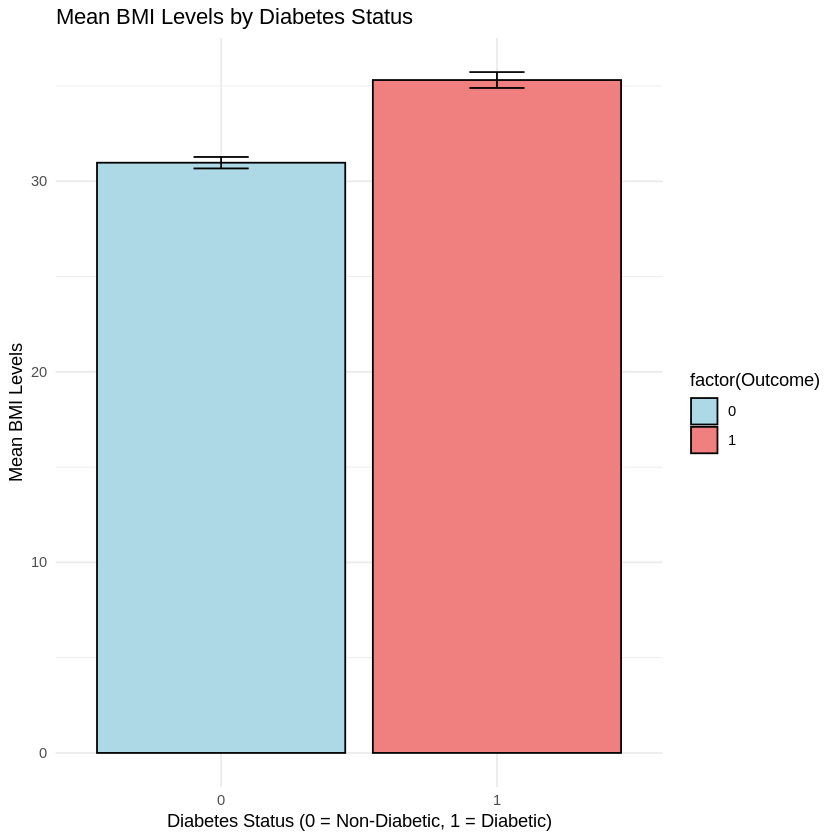

In [899]:
# Calculate mean and standard error for BMI levels
bmi_summary <- data %>%
  group_by(Outcome) %>%
  summarise(
    Mean = mean(BMI, na.rm = TRUE),
    SE = sd(BMI, na.rm = TRUE) / sqrt(n())
  )

# Bar plot with error bars
ggplot(bmi_summary, aes(x = factor(Outcome), y = Mean, fill = factor(Outcome))) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  geom_errorbar(aes(ymin = Mean - SE, ymax = Mean + SE), width = 0.2) +
  labs(
    title = "Mean BMI Levels by Diabetes Status",
    x = "Diabetes Status (0 = Non-Diabetic, 1 = Diabetic)",
    y = "Mean BMI Levels"
  ) +
  scale_fill_manual(values = c("0" = "lightblue", "1" = "lightcoral")) +
  theme_minimal()


The bar plot with error bars indicates that diabetic patients (Outcome = 1) have a higher mean BMI compared to non-diabetic patients (Outcome = 0). The error bars represent the standard error, confirming the statistical significance of the difference in BMI levels between the groups.

###PART 4: Simulation Task

####4.1    Take 25 Random Samples of Size 15 from the Dataset


Select the Column

In [874]:
selected_column = data$Glucose

Compute Confidence Interval

In [875]:
# function to compute confidence interval
compute_ci = function(sample_data) {
  n = length(sample_data)
  sample_mean = mean(sample_data)
  sample_sd = sd(sample_data)
  error_margin = qt(0.975, df = n - 1) * (sample_sd / sqrt(n))
  lower_bound = sample_mean - error_margin
  upper_bound = sample_mean + error_margin
  c(lower_bound, upper_bound)
}


 Generate Random Samples

In [876]:
# generate 25 random samples and compute confidence intervals
set.seed(123)  # For reproducibility
sample_size = 15
n_samples = 25
confidence_intervals = data.frame(
  Lower = numeric(n_samples),
  Upper = numeric(n_samples),
  Contains_True_Mean = logical(n_samples)
)

true_mean = mean(selected_column, na.rm = TRUE)

for (i in 1:n_samples) {
  sample_data = sample(selected_column, sample_size, replace = TRUE)
  ci = compute_ci(sample_data)
  confidence_intervals$Lower[i] = ci[1]
  confidence_intervals$Upper[i] = ci[2]
  confidence_intervals$Contains_True_Mean[i] = true_mean >= ci[1] & true_mean <= ci[2]
}


Calculate the Proportion

In [877]:
proportion = mean(confidence_intervals$Contains_True_Mean)
cat("Proportion of confidence intervals containing true mean:", proportion, "\n")

print(confidence_intervals)


Proportion of confidence intervals containing true mean: 0.96 
       Lower    Upper Contains_True_Mean
1  103.07081 136.2625               TRUE
2  109.22178 138.7782               TRUE
3  118.28534 151.7147               TRUE
4  103.94736 139.2526               TRUE
5  105.89234 137.4410               TRUE
6   95.43811 128.6952               TRUE
7  105.17989 130.5534               TRUE
8  109.62080 137.1792               TRUE
9  108.91912 153.8809               TRUE
10 101.22488 140.1085               TRUE
11 119.66812 161.6652               TRUE
12 110.70019 140.7665               TRUE
13 102.10464 136.1620               TRUE
14 105.33098 137.6024               TRUE
15 109.50577 140.0942               TRUE
16 113.35378 135.5795               TRUE
17 105.62019 147.7131               TRUE
18 102.54094 135.3257               TRUE
19 103.11961 138.3471               TRUE
20 101.73857 139.1948               TRUE
21 102.05297 136.4804               TRUE
22 105.06076 144.6726              

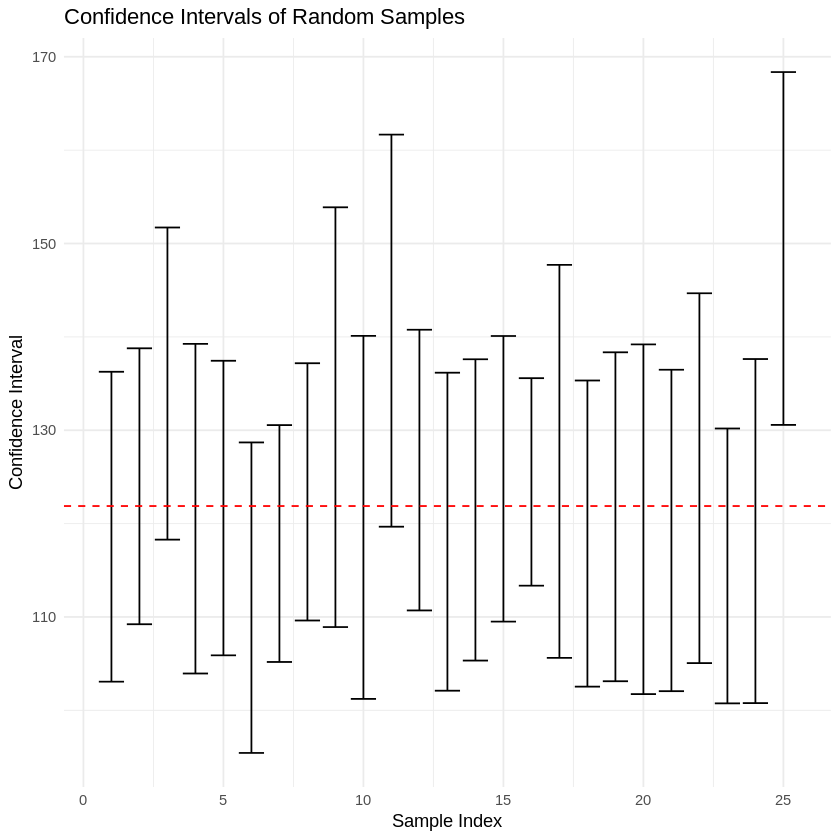

In [878]:
library(ggplot2)
ggplot(confidence_intervals, aes(x = 1:n_samples)) +
  geom_errorbar(aes(ymin = Lower, ymax = Upper)) +
  geom_hline(yintercept = true_mean, color = "red", linetype = "dashed") +
  labs(title = "Confidence Intervals of Random Samples",
       x = "Sample Index",
       y = "Confidence Interval") +
  theme_minimal()


red dashed line ---> shows the true population mean.

The CIs vary in their width because each sample may have different variability and means.



#### 4.2    Increase the Sample Size to 100


In [879]:
sample_size = 100

Creating a Data Frame for Confidence Intervals

In [880]:
confidence_intervals_100 = data.frame(
  Lower = numeric(n_samples),
  Upper = numeric(n_samples),
  Contains_True_Mean = logical(n_samples)
)


Computing Confidence Intervals for Sample Size 100

In [881]:
for (i in 1:n_samples) {
  sample_data = sample(selected_column, sample_size, replace = TRUE)
  ci = compute_ci(sample_data)
  confidence_intervals_100$Lower[i] = ci[1]
  confidence_intervals_100$Upper[i] = ci[2]
  confidence_intervals_100$Contains_True_Mean[i] = true_mean >= ci[1] & true_mean <= ci[2]
}

Calculating Proportion Containing the True Mean

In [882]:
proportion_100 = mean(confidence_intervals_100$Contains_True_Mean)
cat("Proportion of confidence intervals (n=100) containing the true mean:", proportion_100, "\n")


Proportion of confidence intervals (n=100) containing the true mean: 0.88 


Calculating Confidence Interval Widths

In [883]:
confidence_intervals_100$Width = confidence_intervals_100$Upper - confidence_intervals_100$Lower
average_width_100 = mean(confidence_intervals_100$Width)
cat("Average width of confidence intervals (n=100):", average_width_100, "\n")

# average width for n=15
confidence_intervals$Width = confidence_intervals$Upper - confidence_intervals$Lower
average_width_15 = mean(confidence_intervals$Width)
cat("Average width of confidence intervals (n=15):", average_width_15, "\n")


Average width of confidence intervals (n=100): 12.09743 
Average width of confidence intervals (n=15): 33.99821 


In [884]:
print(confidence_intervals_100)

      Lower    Upper Contains_True_Mean    Width
1  116.2393 127.3607               TRUE 11.12135
2  116.8592 129.0608               TRUE 12.20158
3  109.6322 120.7278              FALSE 11.09562
4  113.2854 126.4746               TRUE 13.18925
5  114.1790 126.4010               TRUE 12.22208
6  121.2994 133.2406               TRUE 11.94117
7  115.1647 127.0153               TRUE 11.85067
8  113.6843 127.3957               TRUE 13.71142
9  116.0357 128.6043               TRUE 12.56853
10 109.6229 121.4171              FALSE 11.79421
11 116.2019 129.0181               TRUE 12.81618
12 110.6354 122.4046               TRUE 11.76923
13 111.2131 123.6269               TRUE 12.41371
14 118.8811 131.7589               TRUE 12.87772
15 117.2642 129.3358               TRUE 12.07163
16 116.7927 129.1073               TRUE 12.31454
17 114.9903 127.0897               TRUE 12.09946
18 112.5813 124.6187               TRUE 12.03738
19 115.9428 127.5772               TRUE 11.63433
20 111.1062 122.3338

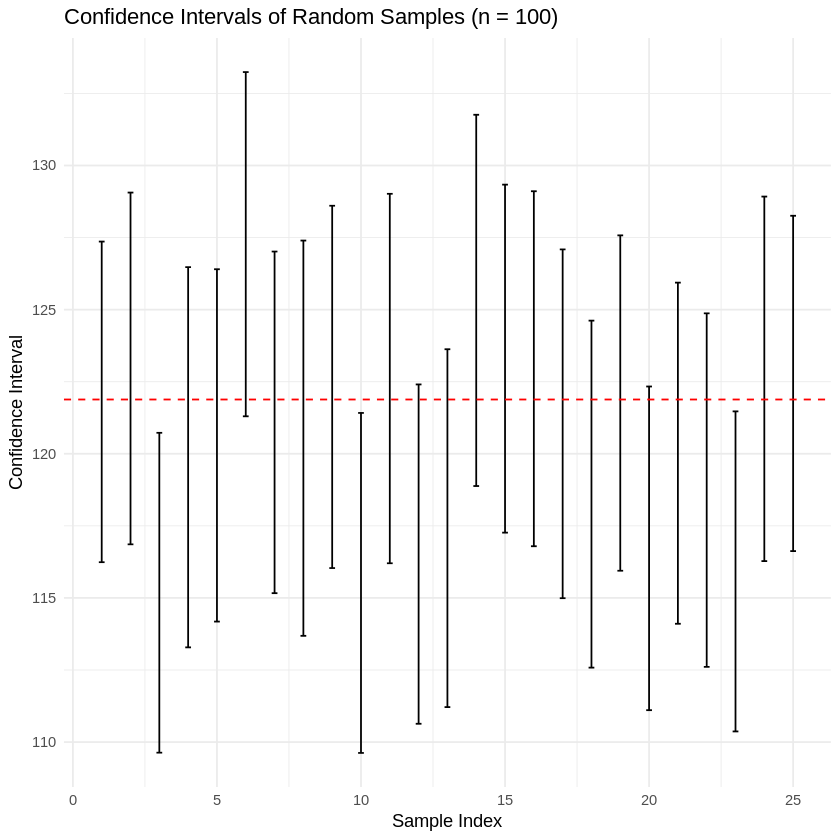

In [885]:
ggplot(confidence_intervals_100, aes(x = 1:n_samples)) +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2) +
  geom_hline(yintercept = true_mean, color = "red", linetype = "dashed") +
  labs(title = "Confidence Intervals of Random Samples (n = 100)",
       x = "Sample Index",
       y = "Confidence Interval") +
  theme_minimal()


Comparing the widths of confidence intervals for  n=15 and  n=100

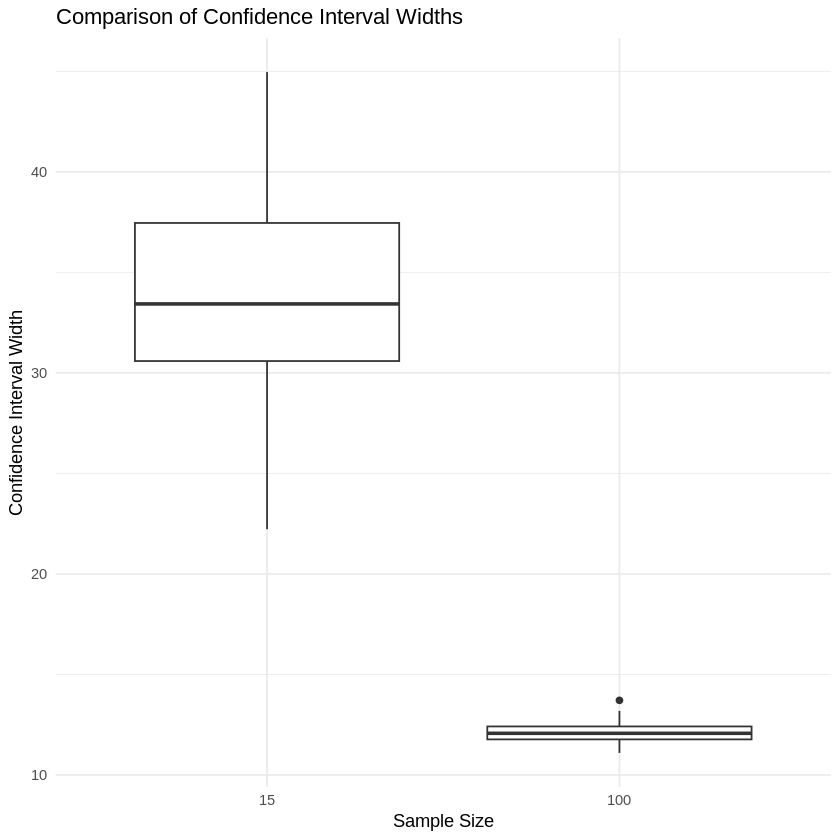

In [886]:
combined_intervals <- rbind(
  data.frame(Sample_Size = 15, Width = confidence_intervals$Width),
  data.frame(Sample_Size = 100, Width = confidence_intervals_100$Width)
)

ggplot(combined_intervals, aes(x = factor(Sample_Size), y = Width)) +
  geom_boxplot() +
  labs(title = "Comparison of Confidence Interval Widths",
       x = "Sample Size",
       y = "Confidence Interval Width") +
  theme_minimal()


**The plot clearly demonstrates that increasing the sample size reduces the width of confidence intervals and improves precision.**


4.3    Take 20 Random Samples of Size 10 from the Dataset

Initializing Parameters and Data Frame

In [887]:
sample_size <- 10
n_samples <- 20

confidence_intervals_10 <- data.frame(
  Lower = numeric(n_samples),
  Upper = numeric(n_samples),
  Contains_True_Mean = logical(n_samples)
)


Loop for Generating Confidence Intervals

In [888]:
for (i in 1:n_samples) {
  sample_data <- sample(selected_column, sample_size, replace = TRUE)
  ci <- compute_ci(sample_data)
  confidence_intervals_10$Lower[i] <- ci[1]
  confidence_intervals_10$Upper[i] <- ci[2]
  confidence_intervals_10$Contains_True_Mean[i] <- true_mean >= ci[1] & true_mean <= ci[2]
}


Calculating Proportion Containing True Mean

In [889]:
proportion_10 <- mean(confidence_intervals_10$Contains_True_Mean)
cat("Proportion of confidence intervals (n=10) containing true mean:", proportion_10, "\n")


Proportion of confidence intervals (n=10) containing true mean: 1 


Calculating and Reporting Average Width

In [890]:
confidence_intervals_10$Width <- confidence_intervals_10$Upper - confidence_intervals_10$Lower
average_width_10 <- mean(confidence_intervals_10$Width)
cat("Average width of confidence intervals (n=10):", average_width_10, "\n")


Average width of confidence intervals (n=10): 41.82203 


 Printing the Results

In [891]:
print(confidence_intervals_10)

       Lower    Upper Contains_True_Mean    Width
1   98.38982 154.4102               TRUE 56.02036
2  117.25286 169.3471               TRUE 52.09427
3  100.90522 148.6948               TRUE 47.78955
4   89.33671 125.4633               TRUE 36.12659
5  112.80075 160.7992               TRUE 47.99850
6  100.28955 136.5104               TRUE 36.22090
7  103.25798 136.5420               TRUE 33.28405
8  105.66417 154.9358               TRUE 49.27165
9  104.88205 159.3179               TRUE 54.43590
10 105.18555 140.6145               TRUE 35.42891
11  96.97295 143.6270               TRUE 46.65409
12 121.06576 153.7342               TRUE 32.66849
13  99.79577 132.2042               TRUE 32.40847
14 103.02243 140.9776               TRUE 37.95514
15  97.32199 134.0780               TRUE 36.75601
16  91.52594 127.0741               TRUE 35.54811
17  95.49641 130.3036               TRUE 34.80718
18 116.88519 158.9148               TRUE 42.02961
19  91.58747 138.6125               TRUE 47.02507


Evaluation the coverage proportion and analyze the relationship between sample size and the accuracy of confidence intervals.

Coverage Proportion:
n = 10:  1 
n = 15:  0.96 
n = 100:  0.88 

Average Width of Confidence Intervals:
n = 10:  41.82203 
n = 15:  33.99821 
n = 100:  12.09743 


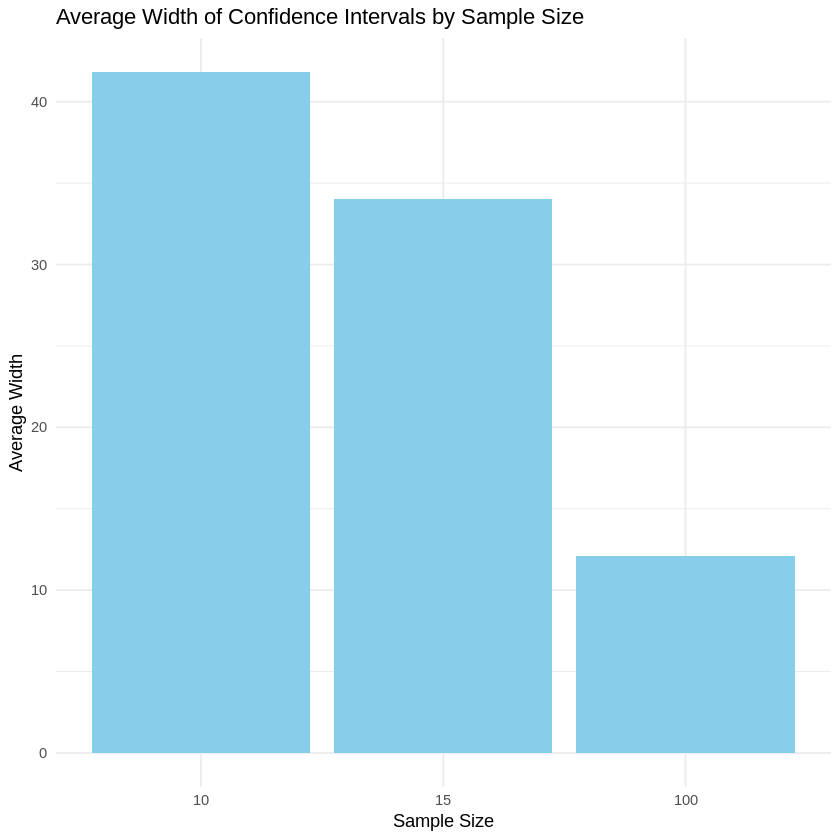

In [892]:
proportion_10 <- mean(confidence_intervals_10$Contains_True_Mean)
proportion_15 <- mean(confidence_intervals$Contains_True_Mean)
proportion_100 <- mean(confidence_intervals_100$Contains_True_Mean)

# Compare proportions
cat("Coverage Proportion:\n")
cat("n = 10: ", proportion_10, "\n")
cat("n = 15: ", proportion_15, "\n")
cat("n = 100: ", proportion_100, "\n")


# Compare average widths of confidence intervals
cat("\nAverage Width of Confidence Intervals:\n")
cat("n = 10: ", average_width_10, "\n")
cat("n = 15: ", average_width_15, "\n")
cat("n = 100: ", average_width_100, "\n")

# average widths
average_widths <- data.frame(
  Sample_Size = c(10, 15, 100),
  Average_Width = c(average_width_10, average_width_15, average_width_100)
)

ggplot(average_widths, aes(x = factor(Sample_Size), y = Average_Width)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Average Width of Confidence Intervals by Sample Size",
       x = "Sample Size",
       y = "Average Width") +
  theme_minimal()


Conclusion

Coverage proportion: Generally around 95% but may vary slightly due to randomness or non-normality in the data.

Interval width: Decreases with increasing sample size, reflecting greater precision.


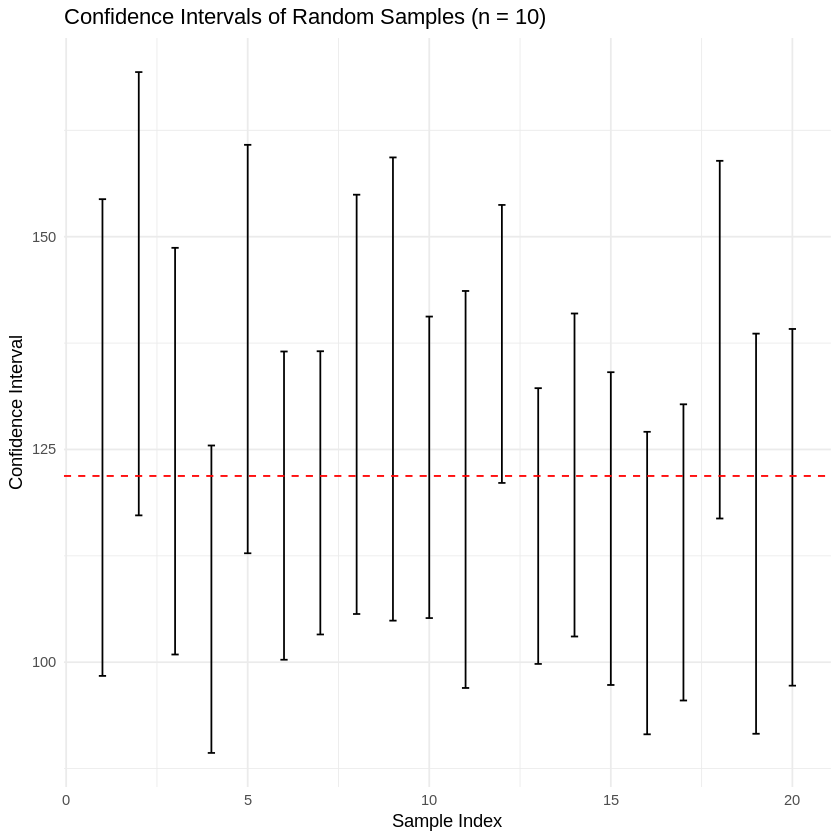

In [893]:
# Visualization of confidence intervals for sample size 10
ggplot(confidence_intervals_10, aes(x = 1:n_samples)) +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2) +
  geom_hline(yintercept = true_mean, color = "red", linetype = "dashed") +
  labs(title = "Confidence Intervals of Random Samples (n = 10)",
       x = "Sample Index",
       y = "Confidence Interval") +
  theme_minimal()


The dashed red line represents the true mean, allowing you to visually assess how many intervals contain the true mean.